In [2]:
import pickle
import pandas as pd
import numpy as np
import seaborn as sns
import os
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from time import time
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import classification_report, f1_score
from sklearn.metrics import accuracy_score


# Đọc dữ liệu vào chung DataFrame

In [3]:
path = './data'
df = pd.DataFrame()

files = [os.path.join(path, file) for file in os.listdir(path)]
for i in range(len(files)):
    df_title = pd.read_csv(files[i], low_memory = False)
    df = pd.concat([df, df_title], ignore_index=True)

# Hiểu thị dữ liệu ban đầu

In [4]:
df

,ts,uid,id.orig_h,id.orig_p,id.resp_h,id.resp_p,proto,service,duration,orig_bytes,...,local_resp,missed_bytes,history,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes,tunnel_parents,label,detailed-label
0,1.526758e+09,Cmfuxv12gjASqjX8Cc,192.168.2.5,53190.0,121.41.16.177,22.0,tcp,ssh,2.503441,589,...,-,0.0,ShAdDaFf,16.0,1429.0,14.0,3301.0,(empty),Malicious,Attack
1,1.526758e+09,CRB7cGm1wwRQam1N5,192.168.2.5,53193.0,121.41.16.177,22.0,tcp,ssh,2.08954,589,...,-,0.0,ShAdDaFf,14.0,1325.0,14.0,3301.0,(empty),Malicious,Attack
2,1.526758e+09,CLS5y61O3Eb14aj9k8,192.168.2.5,53196.0,121.41.16.177,22.0,tcp,ssh,2.416994,589,...,-,0.0,ShAdDaFf,14.0,1325.0,17.0,3469.0,(empty),Malicious,Attack
3,1.526758e+09,C8UwE94DqwjPWMRNga,192.168.2.5,53199.0,121.41.16.177,22.0,tcp,ssh,2.21808,589,...,-,0.0,ShAdDaFf,17.0,1481.0,15.0,3353.0,(empty),Malicious,Attack
4,1.526758e+09,CAhYMa2fSQJh3IOKf5,192.168.2.5,46720.0,121.228.51.251,22.0,tcp,-,0.897017,0,...,-,0.0,ShAdFaf,5.0,268.0,4.0,228.0,(empty),Malicious,Attack
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4591369,1.526283e+09,CDkOBx4rYSr1e8fhv2,192.168.100.103,58205.0,82.219.248.202,2323.0,tcp,-,-,-,...,-,0.0,S,1.0,60.0,0.0,0.0,(empty),Malicious,PartOfAHorizontalPortScan
4591370,1.526283e+09,CVJpEm15rmAVdfffdd,192.168.100.103,54925.0,103.137.224.128,9527.0,tcp,-,-,-,...,-,0.0,S,1.0,60.0,0.0,0.0,(empty),Malicious,PartOfAHorizontalPortScan
4591371,1.526283e+09,ClkimM1RceHaESx7bi,192.168.100.103,47361.0,111.49.36.18,23.0,tcp,-,-,-,...,-,0.0,S,1.0,60.0,0.0,0.0,(empty),Malicious,PartOfAHorizontalPortScan
4591372,1.526283e+09,CUtqu01YHr5dDJyTDi,192.168.100.103,46674.0,177.238.46.183,23.0,tcp,-,0.998930,0,...,-,0.0,S,2.0,120.0,0.0,0.0,(empty),Malicious,PartOfAHorizontalPortScan


# Số mẫu của mỗi nhãn tương ứng

In [5]:
df['detailed-label'].value_counts()

-                            1615679
Okiru                        1498019
DDoS                          922937
PartOfAHorizontalPortScan     539499
C&C                             8321
Attack                          6642
C&C-HeartBeat                    229
C&C-Torii                         30
C&C-FileDownload                  13
Okiru-Attack                       3
FileDownload                       2
Name: detailed-label, dtype: int64

# Kiểu dữ liệu của các đặt trưng

In [6]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4591374 entries, 0 to 4591373
Data columns (total 23 columns):
 #   Column          Dtype  
---  ------          -----  
 0   ts              float64
 1   uid             object 
 2   id.orig_h       object 
 3   id.orig_p       float64
 4   id.resp_h       object 
 5   id.resp_p       float64
 6   proto           object 
 7   service         object 
 8   duration        object 
 9   orig_bytes      object 
 10  resp_bytes      object 
 11  conn_state      object 
 12  local_orig      object 
 13  local_resp      object 
 14  missed_bytes    float64
 15  history         object 
 16  orig_pkts       float64
 17  orig_ip_bytes   float64
 18  resp_pkts       float64
 19  resp_ip_bytes   float64
 20  tunnel_parents  object 
 21  label           object 
 22  detailed-label  object 
dtypes: float64(8), object(15)
memory usage: 805.7+ MB
None


# Mô tả thông kê các giá trị của các đặt trưng có kiểu số nguyên

In [7]:
df.describe()

,ts,id.orig_p,id.resp_p,missed_bytes,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes
count,4.591374e+06,4.591374e+06,4.591374e+06,4.591374e+06,4.591374e+06,4.591374e+06,4.591374e+06,4.591374e+06
mean,1.542710e+09,4.040131e+04,1.315516e+04,3.963585e-02,4.921537e+00,2.140545e+02,7.913840e-02,1.112061e+01
std,6.711764e+06,1.209936e+04,1.755173e+04,1.060486e+01,2.864211e+03,8.770512e+04,1.447561e+01,5.849609e+03
min,1.525880e+09,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.545399e+09,3.609700e+04,2.300000e+01,0.000000e+00,1.000000e+00,4.000000e+01,0.000000e+00,0.000000e+00
50%,1.545405e+09,3.648200e+04,8.000000e+01,0.000000e+00,1.000000e+00,6.000000e+01,0.000000e+00,0.000000e+00
75%,1.545417e+09,4.883400e+04,3.721500e+04,0.000000e+00,3.000000e+00,1.600000e+02,0.000000e+00,0.000000e+00
max,1.547157e+09,6.553500e+04,6.553500e+04,5.792000e+03,4.027345e+06,1.127657e+08,2.406500e+04,1.207699e+07


In [8]:
# kiem tra du lieu trong
df.isnull().sum()

ts                0
uid               0
id.orig_h         0
id.orig_p         0
id.resp_h         0
id.resp_p         0
proto             0
service           0
duration          0
orig_bytes        0
resp_bytes        0
conn_state        0
local_orig        0
local_resp        0
missed_bytes      0
history           0
orig_pkts         0
orig_ip_bytes     0
resp_pkts         0
resp_ip_bytes     0
tunnel_parents    0
label             0
detailed-label    0
dtype: int64

# Phân tích dữ liệu và trực quan hóa dữ liệu

object     15
float64     8
dtype: int64


Text(0.5, 1.0, 'Dtype of dataset Columns')

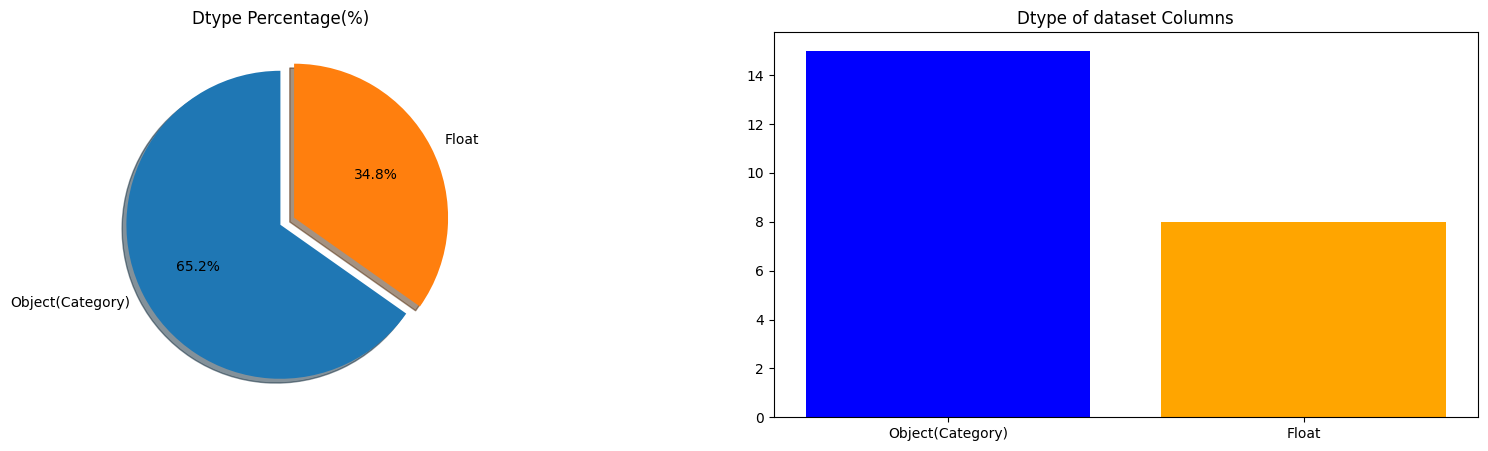

In [9]:
# show dtype of dataset

fig, axes = plt.subplots(1, 2, sharex=False, figsize=(20,5))
value_total = df.dtypes.value_counts()
print(value_total)
labels = ['Object(Category)', 'Float']
sizes = value_total
explode = (0, 0.1) # only "explode" the 2nd slice (i.e. 'Hogs')
axes[0].pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',shadow=True, startangle=90)
axes[0].set_title('Dtype Percentage(%)')
axes[1].bar(labels, value_total, color=['b','orange','g'])
axes[1].set_title('Dtype of dataset Columns')

In [10]:
# Split into numerical columns and non-numberic(object) columns
cat_cols = []
for col in df.select_dtypes(include='object'):
  cat_cols.append(col)
num_cols = []
for col in df.select_dtypes(exclude='object'):
  num_cols.append(col)
print(num_cols)
print('----')
print(cat_cols)

['ts', 'id.orig_p', 'id.resp_p', 'missed_bytes', 'orig_pkts', 'orig_ip_bytes', 'resp_pkts', 'resp_ip_bytes']
----
['uid', 'id.orig_h', 'id.resp_h', 'proto', 'service', 'duration', 'orig_bytes', 'resp_bytes', 'conn_state', 'local_orig', 'local_resp', 'history', 'tunnel_parents', 'label', 'detailed-label']


# Trực quan hóa phân bố dữ liệu của dữ liệu object

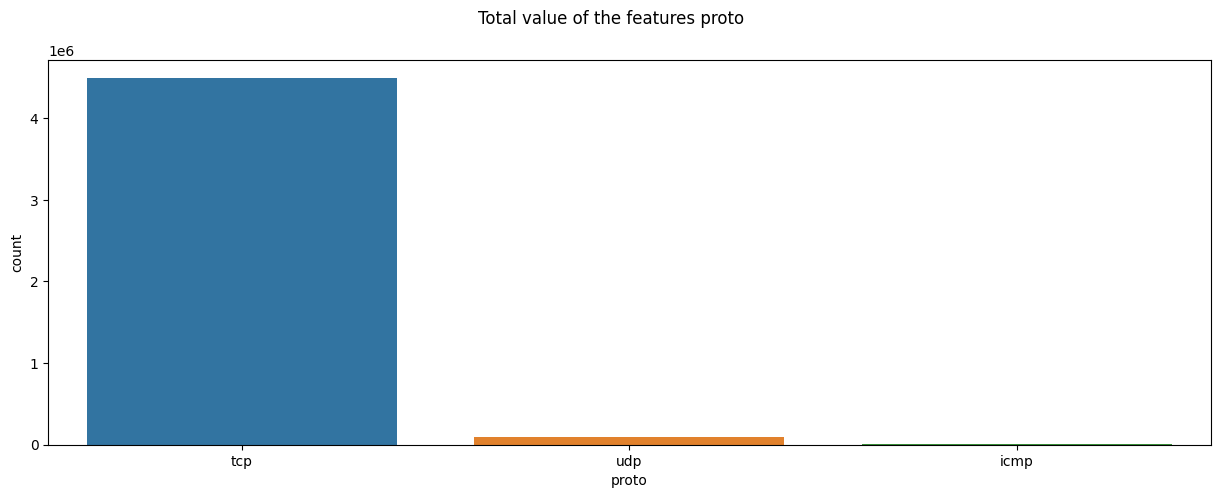

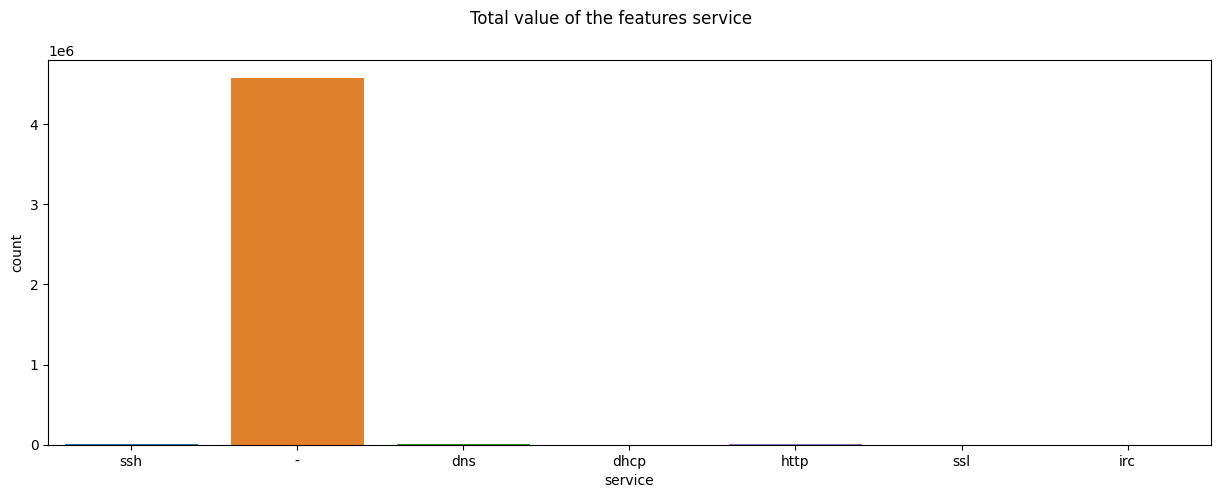

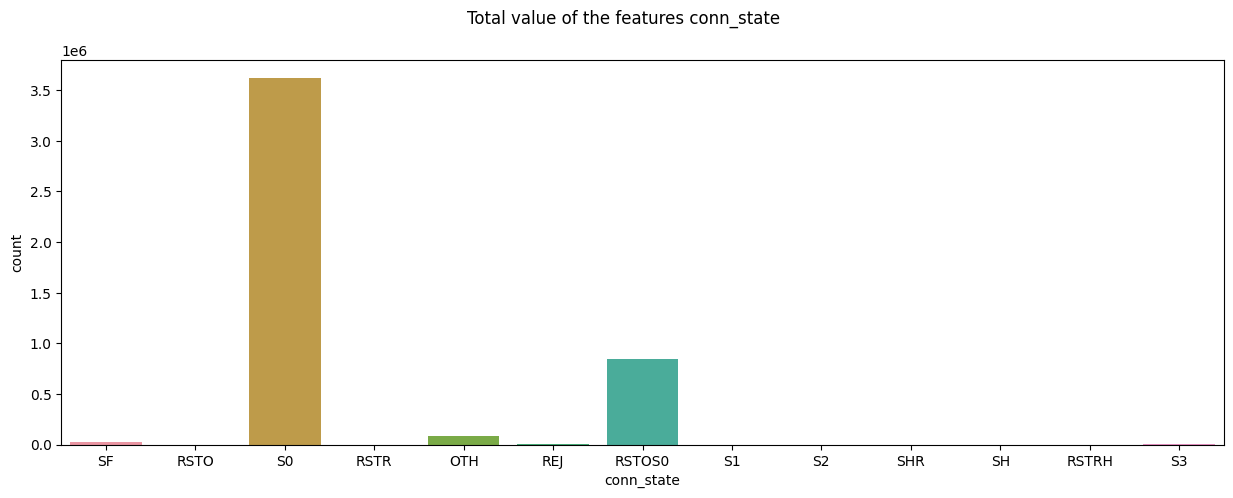

In [11]:

data = df[['proto', 'service', 'conn_state']]

numberColTitles = len(data.columns)

for i in range(numberColTitles):
    fig, axes = plt.subplots(1, 1, figsize=(15, 5))
    sns.countplot(x=data.columns[i], data=data)
    plt.suptitle('Total value of the features ' + data.columns[i])

plt.show()

# Trực quan hóa phân bố dữ liệu của dữ liệu số

# Lưu ý sửa thêm

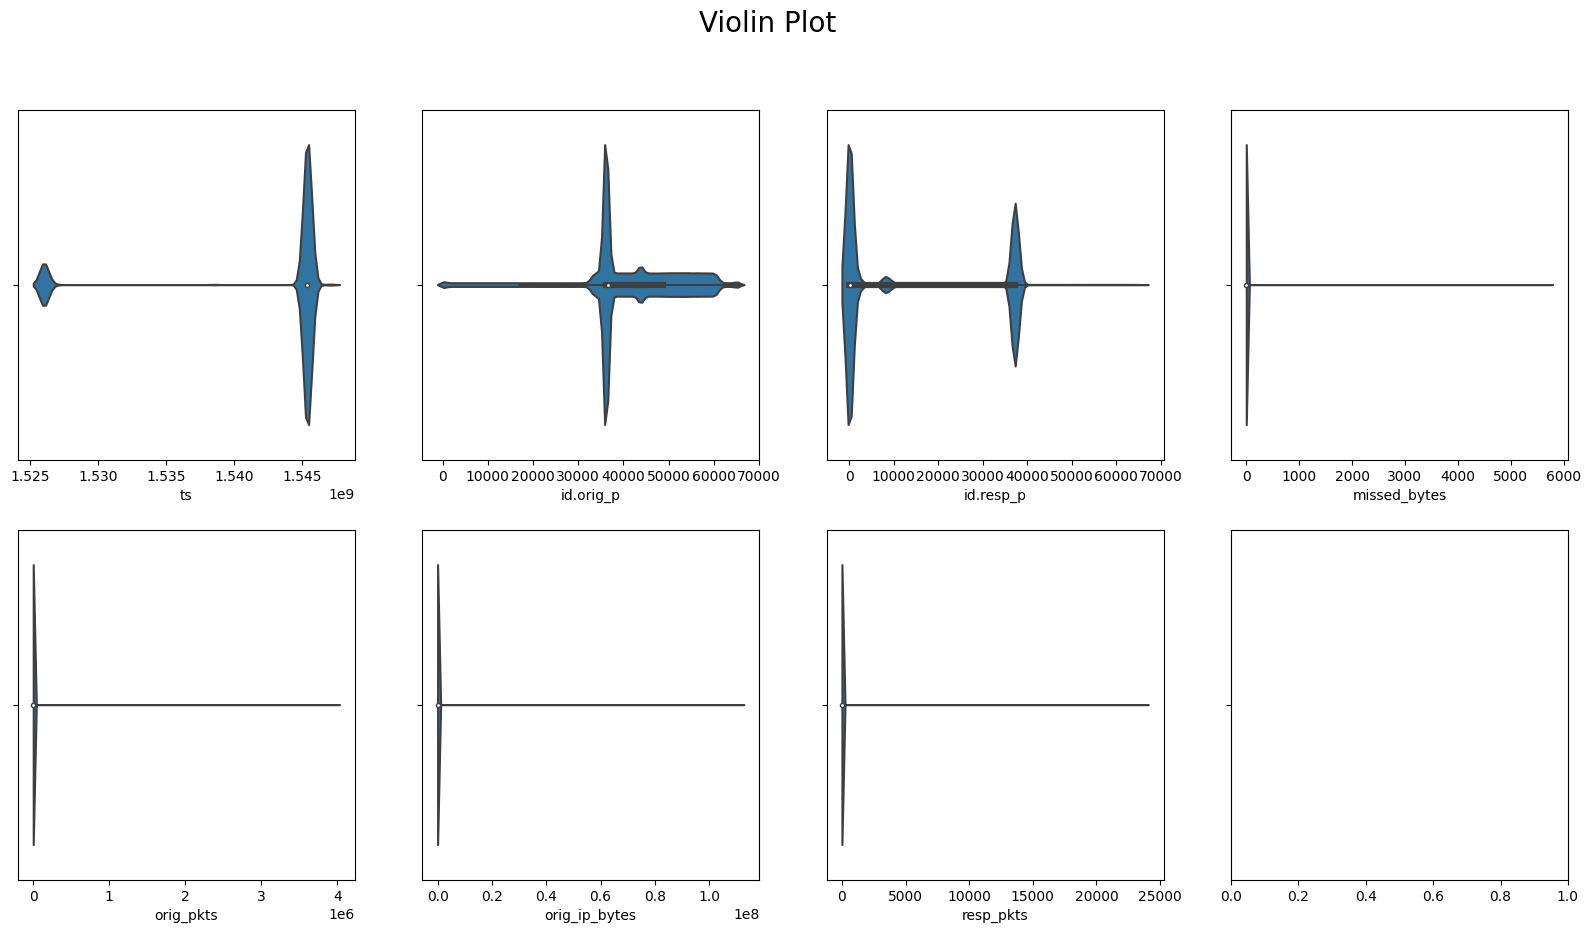

In [12]:
# violin plot
fig, axes = plt.subplots(2,4, figsize=(20, 10), sharey=True)
fig.suptitle('Violin Plot', fontsize=20)
num_cols1 = num_cols.copy()
corr = df[num_cols1].corr()
for i,col in zip(range(7),corr):
      sns.violinplot(x=df[col],ax=axes[i//4][i%4])

# Trực quan hóa dữ liệu nhiễu

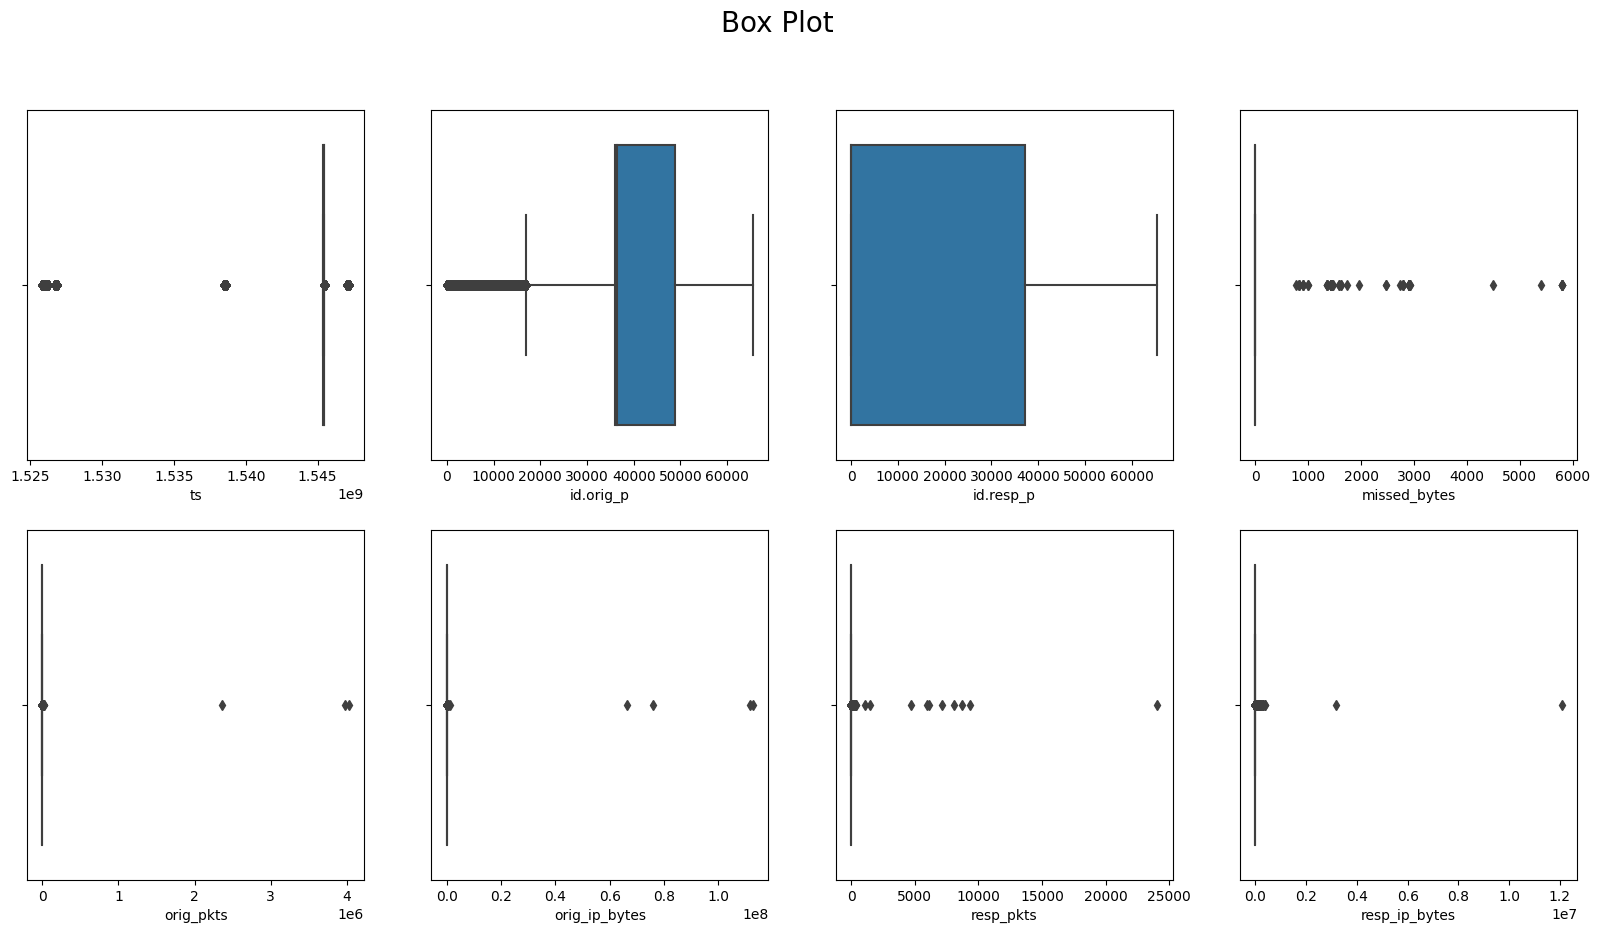

In [13]:
# boxplot
fig, axes = plt.subplots(2,4, figsize=(20, 10), sharey=True)
fig.suptitle('Box Plot', fontsize=20)
num_cols1 = num_cols.copy()
corr = df[num_cols1].corr()
for i,col in zip(range(8),corr):
      sns.boxplot(x=df[col],ax=axes[i//4][i%4])

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4591374 entries, 0 to 4591373
Data columns (total 23 columns):
 #   Column          Dtype  
---  ------          -----  
 0   ts              float64
 1   uid             object 
 2   id.orig_h       object 
 3   id.orig_p       float64
 4   id.resp_h       object 
 5   id.resp_p       float64
 6   proto           object 
 7   service         object 
 8   duration        object 
 9   orig_bytes      object 
 10  resp_bytes      object 
 11  conn_state      object 
 12  local_orig      object 
 13  local_resp      object 
 14  missed_bytes    float64
 15  history         object 
 16  orig_pkts       float64
 17  orig_ip_bytes   float64
 18  resp_pkts       float64
 19  resp_ip_bytes   float64
 20  tunnel_parents  object 
 21  label           object 
 22  detailed-label  object 
dtypes: float64(8), object(15)
memory usage: 805.7+ MB


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_6900\2048138225.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cor = df.corr()


<Axes: >

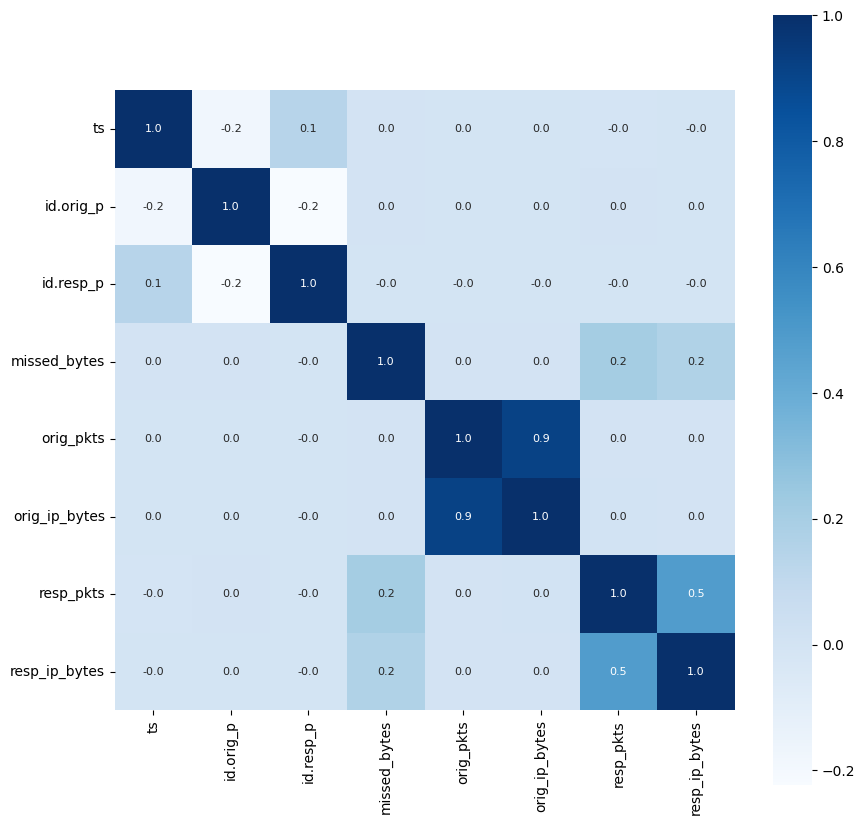

In [15]:
cor = df.corr()
plt.figure(figsize=(10, 10))
sns.heatmap(cor, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size': 8}, cmap= 'Blues')

In [16]:
print(df['detailed-label'].value_counts())

-                            1615679
Okiru                        1498019
DDoS                          922937
PartOfAHorizontalPortScan     539499
C&C                             8321
Attack                          6642
C&C-HeartBeat                    229
C&C-Torii                         30
C&C-FileDownload                  13
Okiru-Attack                       3
FileDownload                       2
Name: detailed-label, dtype: int64


# Tiền xử lý

In [17]:
data_preproces = df.copy()

In [18]:
X = data_preproces.drop(columns=['detailed-label', 'label', 'uid', 'id.resp_h', 'local_orig', 'local_resp', 'tunnel_parents', 'missed_bytes'])
Y = data_preproces['detailed-label']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=10, test_size=0.3)

x_test = X_test.copy()
x_test['detailed-label'] = Y_test
x_test.to_csv('data_test.csv')

In [19]:
print(X_train.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3213961 entries, 3070978 to 1929743
Data columns (total 15 columns):
 #   Column         Dtype  
---  ------         -----  
 0   ts             float64
 1   id.orig_h      object 
 2   id.orig_p      float64
 3   id.resp_p      float64
 4   proto          object 
 5   service        object 
 6   duration       object 
 7   orig_bytes     object 
 8   resp_bytes     object 
 9   conn_state     object 
 10  history        object 
 11  orig_pkts      float64
 12  orig_ip_bytes  float64
 13  resp_pkts      float64
 14  resp_ip_bytes  float64
dtypes: float64(7), object(8)
memory usage: 392.3+ MB
None


# Xử lý tính hiệu nhiễu

In [20]:
number_cols = []
for col in X_train.select_dtypes(exclude='object'):
  number_cols.append(col)
print(number_cols)

['ts', 'id.orig_p', 'id.resp_p', 'orig_pkts', 'orig_ip_bytes', 'resp_pkts', 'resp_ip_bytes']


# Trước khi xử lý tính hiệu nhiễu

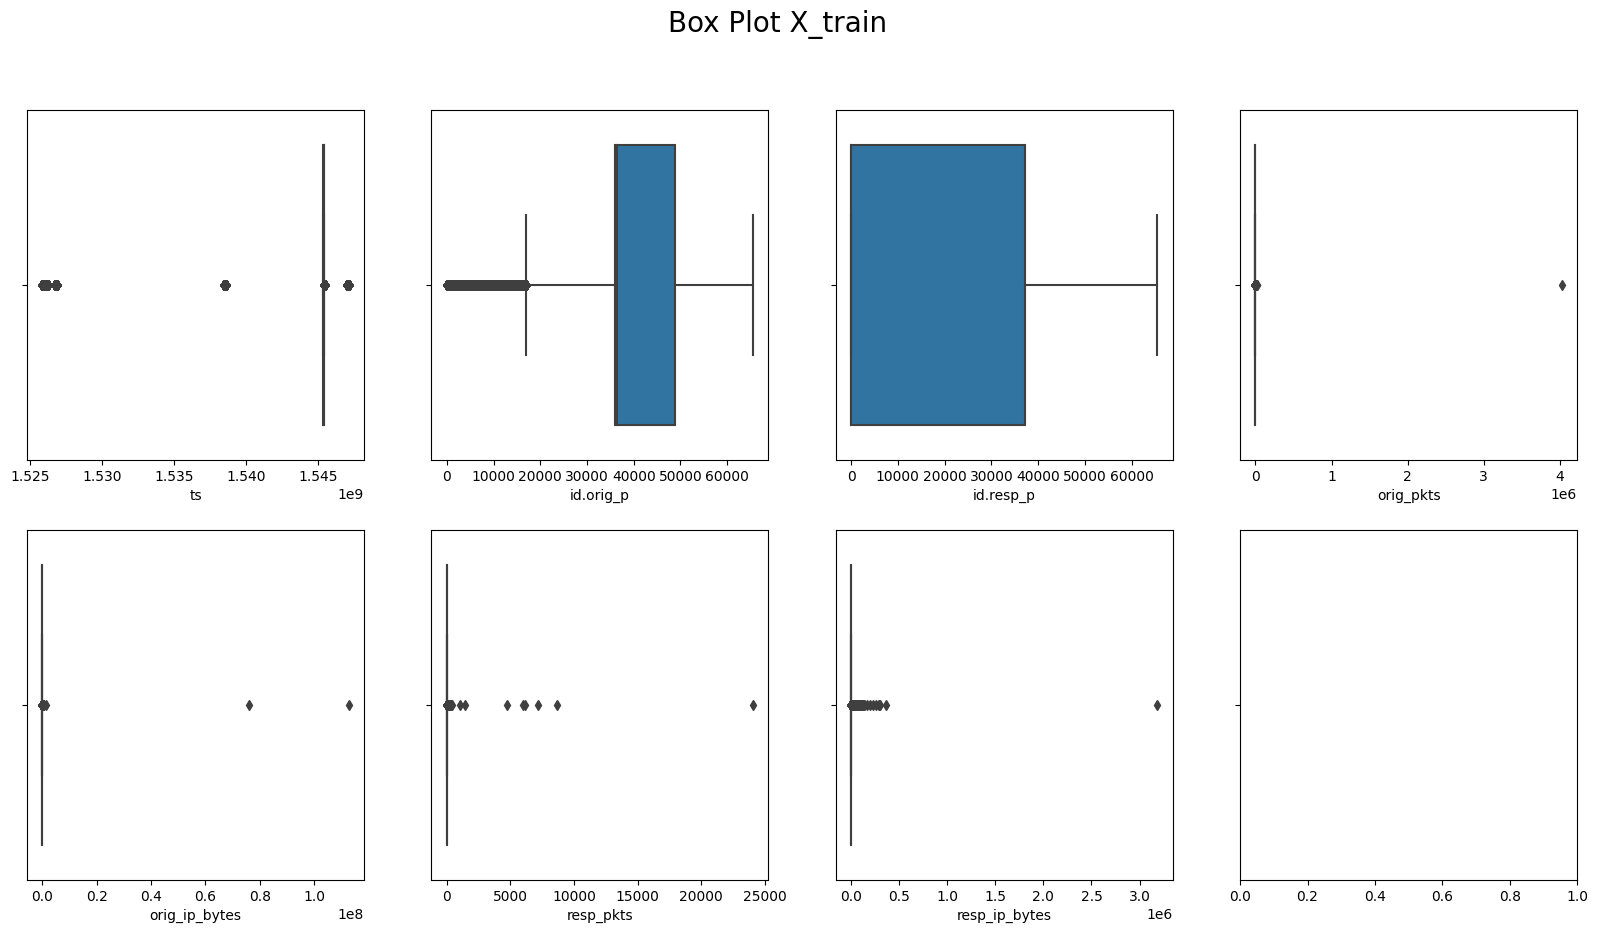

In [21]:
fig, axes = plt.subplots(2,4, figsize=(20, 10), sharey=True)
fig.suptitle('Box Plot X_train', fontsize=20)
num_cols1 = number_cols.copy()
corr = df[num_cols1].corr()
for i,col in zip(range(7),corr):
      sns.boxplot(x=X_train[col],ax=axes[i//4][i%4])

In [22]:
def detect_outliers_iqr(data, column):
    upper = None
    lower = None

    Q3 = data[column].quantile(0.75)
    Q1 = data[column].quantile(0.25)
    IQR = Q3 - Q1

    # Xác định ngưỡng trên và ngưỡng dưới
    upper = Q3 + 1.5 * IQR
    lower = Q1 - 1.5 * IQR
    
    return upper, lower, column

In [23]:
def replace_outliers(data, column):
    upper, lower, column = detect_outliers_iqr(data, column)
    data.loc[data[column]>=upper, column]=upper
    data.loc[data[column]<=lower, column]=lower
    return data

# Xử lý trên tập Train

In [24]:
for num in range(len(number_cols)):
    replace_outliers(X_train, number_cols[num])

# Sau khi xử lý tính hiệu nhiễu

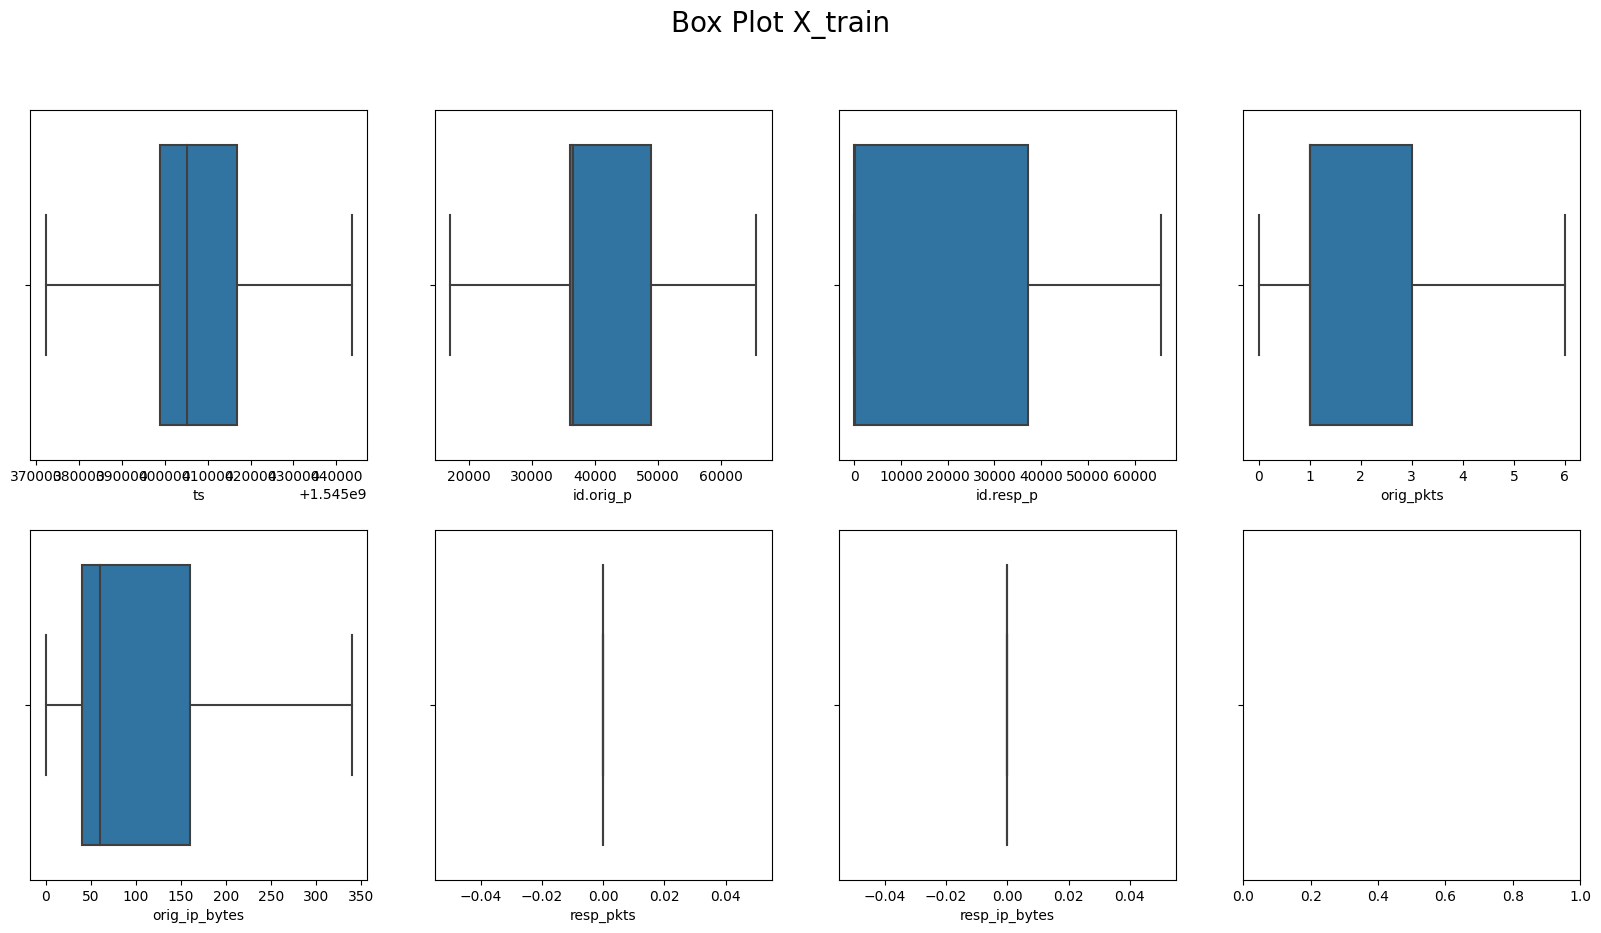

In [25]:
fig, axes = plt.subplots(2,4, figsize=(20, 10), sharey=True)
fig.suptitle('Box Plot X_train', fontsize=20)
num_cols1 = number_cols.copy()
corr = df[num_cols1].corr()
for i,col in zip(range(7),corr):
      sns.boxplot(x=X_train[col],ax=axes[i//4][i%4])

# Xứ lý dữ liệu trống và chuyển kiểu dữ liệu chuỗi thành kiểu số của các đặt trưng

In [26]:
import json

encoder = LabelEncoder()

def data_param_features(original_values, unique_values, feature):
    object_data_param = {}
    for original_value, replaced_value in zip(original_values, unique_values):
        data_element = {
            str(original_value): float(replaced_value)
        }
        object_data_param.update(data_element)
        object_data  = {
            feature: object_data_param
        }
    return object_data

# lưu các biến đước tiền xử lý và gán giá trị tương ứng
def save_value_replace(X_train, data_param_array, feature):
    # Lấy ra các giá trị không trung nhau
    unique_features = X_train[feature].unique()
    # Lấy tên tương ứng với giá trị đã thay thế
    original_features = encoder.inverse_transform(unique_features)
    data_param_feature = data_param_features(original_features, unique_features, feature)
    data_param_array.update(data_param_feature)
    return data_param_array

# hàm chuyển thành kiểu số
def convert_data_features(X_train, data_param_array, feature):
    X_train[feature] = encoder.fit_transform(X_train[feature])
    data_param_array = save_value_replace(X_train, data_param_array, feature)
    return data_param_array

data_param_array = {}
number_features = ['proto', 'service', 'conn_state', 'history', 'id.orig_h']

for feaure in range(len(number_features)):
    data_param_array = convert_data_features(X_train, data_param_array, number_features[feaure])

# X_train['duration'] = X_train['duration'].str.replace('S0', ' ')
X_train['duration'] = pd.to_numeric(X_train['duration'], errors='coerce')
X_train['orig_bytes'] = pd.to_numeric(X_train['orig_bytes'], errors='coerce')
X_train['resp_bytes'] = pd.to_numeric(X_train['resp_bytes'], errors='coerce')

value_mean = X_train[['duration', 'orig_bytes', 'resp_bytes']].mean()
X_train[['duration','orig_bytes','resp_bytes']] = X_train[['duration','orig_bytes','resp_bytes']].fillna(value_mean)

# add to array
data_param_array.update({'duration': {'value': value_mean['duration']} })
data_param_array.update({'orig_bytes': {'value': value_mean['orig_bytes']}})
data_param_array.update({'resp_bytes': {'value': value_mean['resp_bytes']}})

# dữ liệu nhãn
Y_train = Y_train.str.replace('-', 'Benign')
Y_train = Y_train.astype(str)
Y_train = encoder.fit_transform(Y_train)
Y_train = Y_train.astype(int)

# Lấy ra các giá trị không trung nhau
y_train_df = pd.DataFrame(Y_train, columns=['detailed-label'])
unique_detailed_labels = y_train_df['detailed-label'].unique()
# Lấy tên tương ứng với giá trị đã thay thế
original_detailed_labels = encoder.inverse_transform(unique_detailed_labels)
data_param_detailed_label = data_param_features(original_detailed_labels, unique_detailed_labels, 'detailed-label')
data_param_array.update(data_param_detailed_label)

print(Y_train.dtype)
print(X_train.info())
# Ghi vào tệp JSON
with open('output_array.json', 'w') as json_file:
    json.dump(data_param_array, json_file)

int32
<class 'pandas.core.frame.DataFrame'>
Int64Index: 3213961 entries, 3070978 to 1929743
Data columns (total 15 columns):
 #   Column         Dtype  
---  ------         -----  
 0   ts             float64
 1   id.orig_h      int32  
 2   id.orig_p      float64
 3   id.resp_p      float64
 4   proto          int32  
 5   service        int32  
 6   duration       float64
 7   orig_bytes     float64
 8   resp_bytes     float64
 9   conn_state     int32  
 10  history        int32  
 11  orig_pkts      float64
 12  orig_ip_bytes  float64
 13  resp_pkts      float64
 14  resp_ip_bytes  float64
dtypes: float64(10), int32(5)
memory usage: 331.0 MB
None


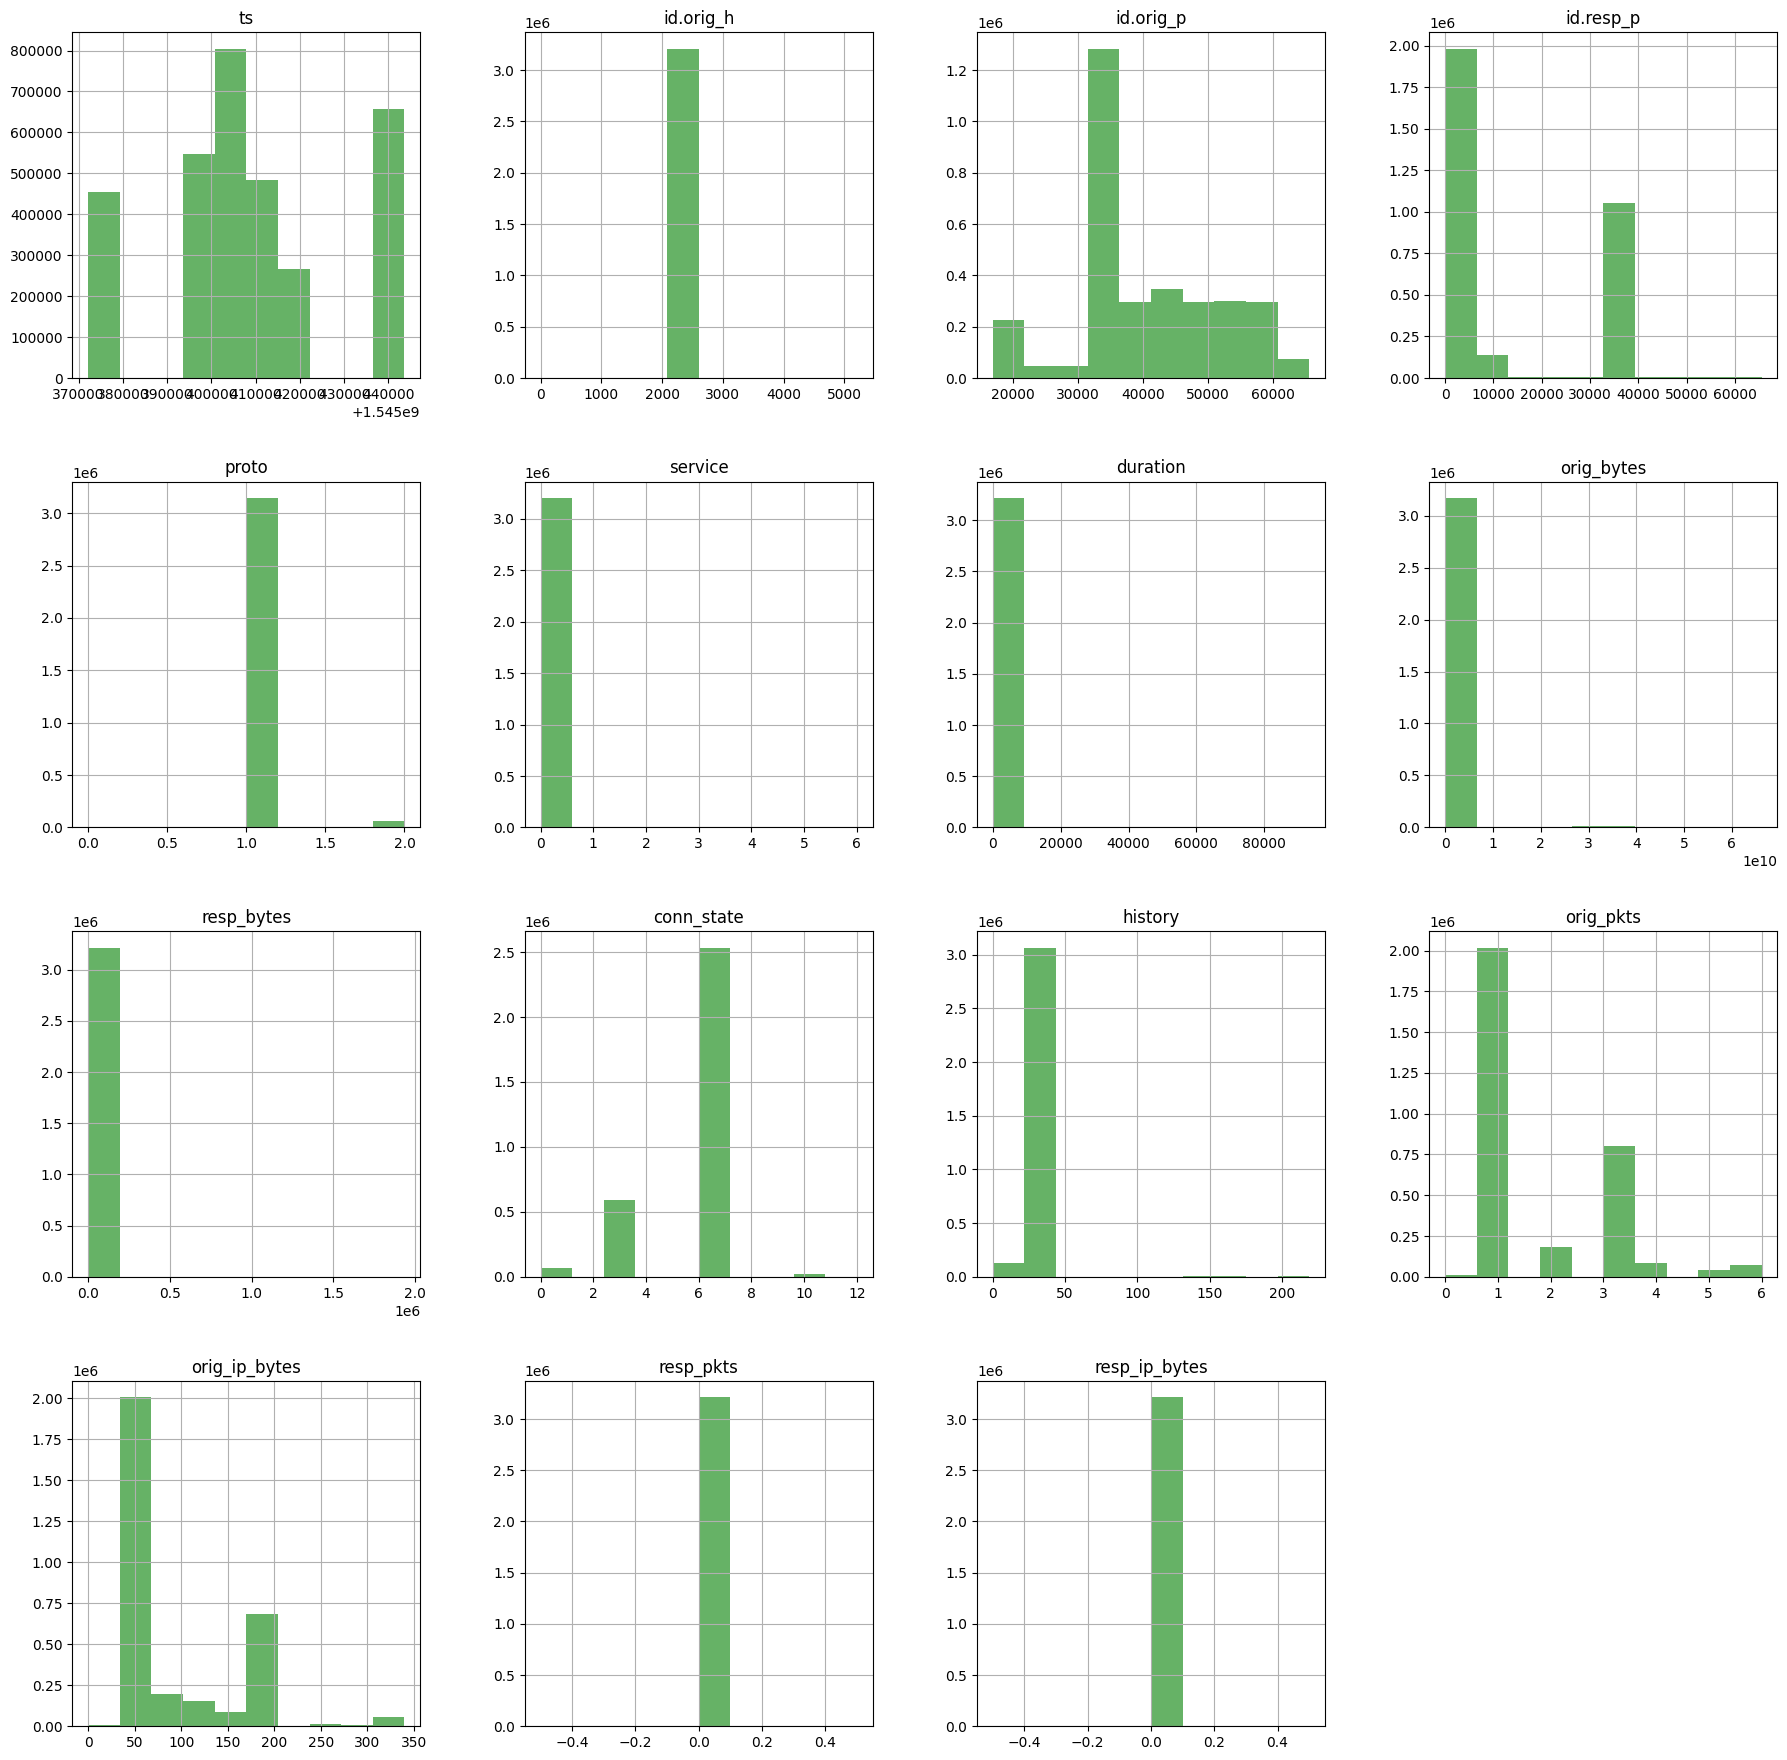

In [27]:
X_train.hist(alpha=0.6, figsize=(21 + 1, 21 + 1), color='green')
plt.show()

In [28]:
X_train.describe()

,ts,id.orig_h,id.orig_p,id.resp_p,proto,service,duration,orig_bytes,resp_bytes,conn_state,history,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes
count,3.213961e+06,3.213961e+06,3.213961e+06,3.213961e+06,3.213961e+06,3.213961e+06,3.213961e+06,3.213961e+06,3.213961e+06,3.213961e+06,3.213961e+06,3.213961e+06,3.213961e+06,3213961.0,3213961.0
mean,1.545409e+09,2.141146e+03,4.090914e+04,1.315252e+04,1.018468e+00,1.454840e-02,7.091941e+00,1.250283e+09,1.374808e+01,5.348175e+00,2.381349e+01,1.798434e+00,9.105561e+01,0.0,0.0
std,2.171116e+04,6.470640e+01,1.078931e+04,1.755020e+04,1.473049e-01,2.378196e-01,7.374016e+01,3.916079e+09,1.133796e+03,1.438485e+00,1.221722e+01,1.199252e+00,6.662190e+01,0.0,0.0
min,1.545372e+09,0.000000e+00,1.698250e+04,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e-06,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0
25%,1.545399e+09,2.139000e+03,3.609700e+04,2.300000e+01,1.000000e+00,0.000000e+00,3.149208e+00,0.000000e+00,0.000000e+00,6.000000e+00,2.400000e+01,1.000000e+00,4.000000e+01,0.0,0.0
50%,1.545405e+09,2.139000e+03,3.648600e+04,8.000000e+01,1.000000e+00,0.000000e+00,7.091941e+00,1.250283e+09,1.374808e+01,6.000000e+00,2.400000e+01,1.000000e+00,6.000000e+01,0.0,0.0
75%,1.545417e+09,2.141000e+03,4.884000e+04,3.721500e+04,1.000000e+00,0.000000e+00,7.091941e+00,1.250283e+09,1.374808e+01,6.000000e+00,2.400000e+01,3.000000e+00,1.600000e+02,0.0,0.0
max,1.545444e+09,5.205000e+03,6.553500e+04,6.553400e+04,2.000000e+00,6.000000e+00,9.328003e+04,6.620558e+10,1.934496e+06,1.200000e+01,2.190000e+02,6.000000e+00,3.400000e+02,0.0,0.0


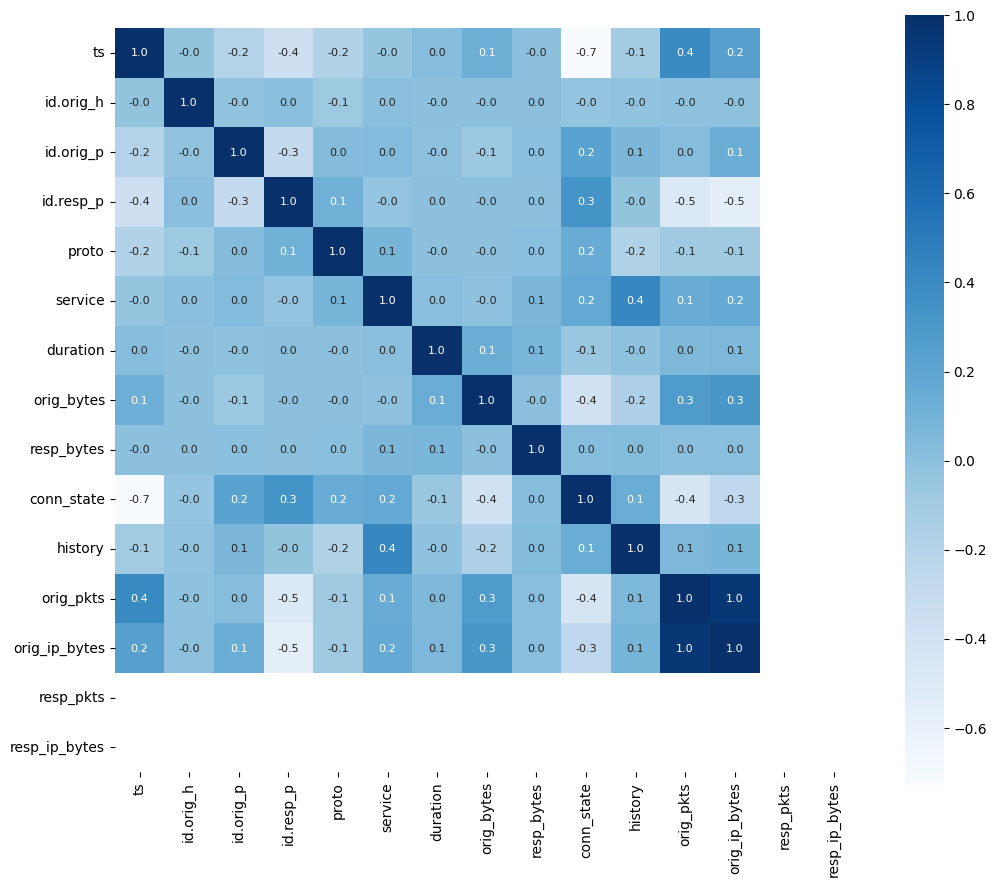

In [29]:
# Mô ta su tuong quan giua cac dac trung trong data da duoc lam sach
cor = X_train.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(cor, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size': 8}, cmap= 'Blues')
plt.show()

# Tìm đặc trưng tốt nhất

In [30]:
from sklearn.feature_selection import mutual_info_classif
mutual_info = mutual_info_classif(X_train, Y_train)
mutual_info = pd.Series(mutual_info)
mutual_info.index = X_train.columns
mutual_info.sort_values(ascending=False)

ts               1.246772
id.resp_p        1.233581
id.orig_h        1.152274
id.orig_p        0.972925
orig_ip_bytes    0.967430
conn_state       0.752310
history          0.681248
duration         0.582686
orig_pkts        0.471588
orig_bytes       0.309901
resp_bytes       0.259027
proto            0.191934
service          0.017508
resp_pkts        0.000000
resp_ip_bytes    0.000000
dtype: float64

<Axes: >

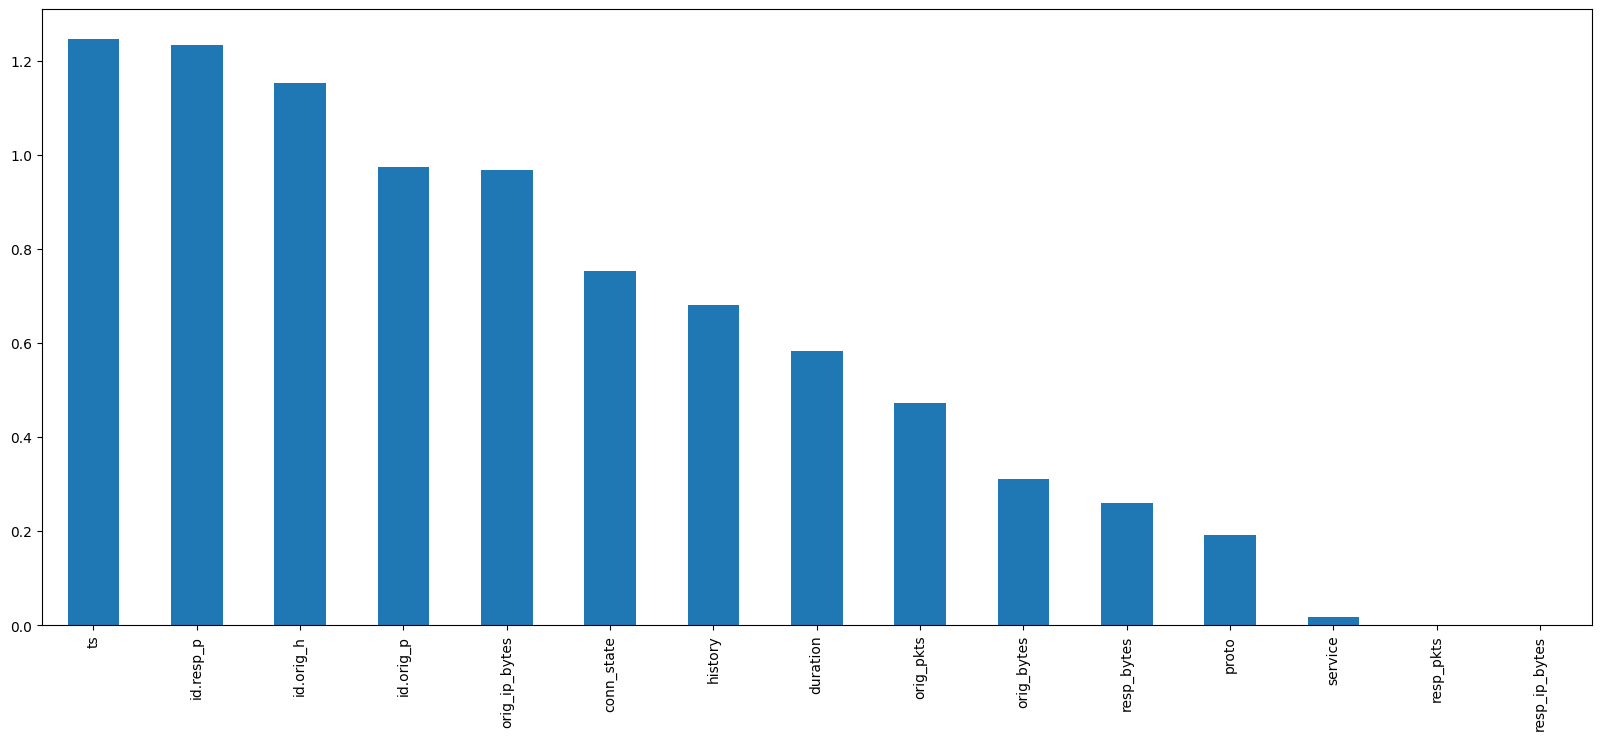

In [31]:
mutual_info.sort_values(ascending=False).plot.bar(figsize=(20,8))

# Tiền xử lý tập Test

In [32]:
# fig, axes = plt.subplots(2,4, figsize=(20, 10), sharey=True)
# fig.suptitle('Box Plot X_test', fontsize=20)
# num_cols1 = number_cols.copy()
# corr = df[num_cols1].corr()
# for i,col in zip(range(7),corr):
#       sns.boxplot(x=X_test[col],ax=axes[i//4][i%4])

In [33]:
# for num in range(len(number_cols)):
#     replace_outliers(X_test, number_cols[num])

In [34]:
# fig, axes = plt.subplots(2,4, figsize=(20, 10), sharey=True)
# fig.suptitle('Box Plot X_test', fontsize=20)
# num_cols1 = number_cols.copy()
# corr = df[num_cols1].corr()
# for i,col in zip(range(7),corr):
#       sns.boxplot(x=X_test[col],ax=axes[i//4][i%4])

# Xử lý giá trị trống và thay đổi giá trị chuỗi thành số

In [35]:
import json

with open('output_array.json', 'r') as json_file:
    data = json.load(json_file)

def replace_data_test_features(index, row, feaure, X_test, data):    
    X_test.at[index, feaure] = data[feaure].get(row[feaure], 0)

def convert_data_test_features(feaure, X_test):
    X_test[feaure] = pd.to_numeric(X_test[feaure], errors='coerce')

for index, row in X_test.iterrows():
    for feature in range(len(number_features)):
        replace_data_test_features(index, row, number_features[feature], X_test, data)
    
    if(row['duration'] == '-'):
        X_test.at[index, 'duration'] = data['duration']['value']
    if(row['orig_bytes'] == '-'):
        X_test.at[index, 'orig_bytes'] = data['orig_bytes']['value']
    if(row['resp_bytes'] == '-'):
        X_test.at[index, 'resp_bytes'] = data['resp_bytes']['value']

Y_test_calculate = Y_test.copy()

for row in range(len(Y_test)):
    if (Y_test.iloc[row] == '-'):
        Y_test.iloc[row] = 'Benign'
        Y_test.iloc[row] = data['detailed-label'].get(Y_test.iloc[row], 0)
    else:
        Y_test.iloc[row] = data['detailed-label'].get(Y_test.iloc[row], 0)

Y_test = pd.to_numeric(Y_test, errors='coerce')
X_test['duration'] = pd.to_numeric(X_test['duration'], errors='coerce')
X_test['orig_bytes'] = pd.to_numeric(X_test['orig_bytes'], errors='coerce')
X_test['resp_bytes'] = pd.to_numeric(X_test['resp_bytes'], errors='coerce')

for feature in range(len(number_features)):
    convert_data_test_features(number_features[feature], X_test)

print(X_test.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1377413 entries, 4500891 to 1541593
Data columns (total 15 columns):
 #   Column         Non-Null Count    Dtype  
---  ------         --------------    -----  
 0   ts             1377413 non-null  float64
 1   id.orig_h      1377413 non-null  float64
 2   id.orig_p      1377413 non-null  float64
 3   id.resp_p      1377413 non-null  float64
 4   proto          1377413 non-null  float64
 5   service        1377413 non-null  float64
 6   duration       1377413 non-null  float64
 7   orig_bytes     1377413 non-null  float64
 8   resp_bytes     1377413 non-null  float64
 9   conn_state     1377413 non-null  float64
 10  history        1377413 non-null  float64
 11  orig_pkts      1377413 non-null  float64
 12  orig_ip_bytes  1377413 non-null  float64
 13  resp_pkts      1377413 non-null  float64
 14  resp_ip_bytes  1377413 non-null  float64
dtypes: float64(15)
memory usage: 200.4 MB
None


In [36]:
X_train.isnull().sum()

ts               0
id.orig_h        0
id.orig_p        0
id.resp_p        0
proto            0
service          0
duration         0
orig_bytes       0
resp_bytes       0
conn_state       0
history          0
orig_pkts        0
orig_ip_bytes    0
resp_pkts        0
resp_ip_bytes    0
dtype: int64

In [37]:
np.isnan(Y_train).sum()

0

# Tính toán và hiển thị ma trận và precision, recall

In [38]:
from sklearn.utils.multiclass import unique_labels
from sklearn.metrics import confusion_matrix

def matrix_confusion(y_true, y_pred):
    labels_true = unique_labels(y_true)
    labels_pred = unique_labels(y_pred)
    labels = np.union1d(labels_true, labels_pred)
    column = [f'Predict {label}' for label in labels]
    indices = [f'Actual {label}' for label in labels]
    table = pd.DataFrame(confusion_matrix(y_true, y_pred),
                         columns=column, index=indices)
    return table

In [39]:
def sum_array(arr):
    total = 0
    for num in arr:
        total += num
    return total
# Đo lường tỷ lệ của số lượng mẫu dự đoán đúng(precision: giữa dự đoán đúng với số nhầm lẫn vào nó, recall: giữa dự đoán đúng với số nhầm lẫn)
def calculate_precision_recall(confusion_matrix):
    num_classes = confusion_matrix.shape[0]
    precision = np.zeros(num_classes)
    recall = np.zeros(num_classes)
    TP_total = 0
    TP_FP_total = 0
    TP_FN_total = 0
    precision_averaging = []
    recall_averaging = []
    for i in range(num_classes):
        TP = confusion_matrix[i, i]
        FP = np.sum(confusion_matrix[:, i]) - TP
        FN = np.sum(confusion_matrix[i, :]) - TP
        # tong TP, TP_FP, TP_FN
        TP_total += TP
        TP_FP_total += (TP + FP)
        TP_FN_total += (TP + FN)
        # ty le tinh
        precision[i] = TP / (TP + FP)
        recall[i] = TP / (TP + FN)
    # trung bình vi mô
    precision_Micro_averaging = TP_total / TP_FP_total
    precision_averaging.append(precision_Micro_averaging)
    recall_Micro_averaging = TP_total / TP_FN_total
    recall_averaging.append(recall_Micro_averaging)
    # trung bình vĩ mô
    precision = np.nan_to_num(precision, nan=0)
    recall = np.nan_to_num(recall, nan=0)
    
    precision_Macro_averaging = sum_array(precision) / num_classes
    precision_averaging.append(precision_Macro_averaging)
    recall_Macro_averaging = sum_array(recall) / num_classes
    recall_averaging.append(recall_Macro_averaging)

    return precision_Micro_averaging, recall_Micro_averaging, precision_averaging, recall_averaging

In [40]:

def show_matrix_confusion(Y_test, y_pred_RandomForest):

    CM = matrix_confusion(Y_test, y_pred_RandomForest)
    CM_precision_recall = CM.copy()
    precision, recall, precision_averaging, recall_averaging = calculate_precision_recall(CM_precision_recall.values)
    
    # trung bình vi mô và vĩ mô
    column = ['Micro_averaging', 'Macro_averaging']
    row = ['precision', 'recall']
    table_average = pd.DataFrame([precision_averaging, recall_averaging], columns=column, index= row)
    
    print("Ma tran nham lan \n", CM_precision_recall.values)
    sns.heatmap(CM, annot=True, fmt='d', cmap='viridis')
    print("\nBảng đánh giá hiệu suất trung bình vi mô và vĩ mô của mô hình \n", table_average)

    return precision, recall

In [41]:
def f1_score_model(precision, recall):
    return 2*(precision*recall)/(precision + recall)

In [44]:
# from mlxtend.evaluate import feature_importance_permutation
# from sklearn.inspection import permutation_importance

# # imp_vals, imp_all = feature_importance_permutation(
# #     predict_method = RF.predict,
# #     X = X_test,
# #     y = Y_test,
# #     metric='accuracy',
# #     num_rounds = 50,
# #     seed = 0
# # )

# # std = np.std(imp_all, axis=1)
# # indices = np.argsort(imp_vals)[::-1]

# result = permutation_importance(
#     estimator=RF,
#     X = X_test,
#     y = Y_test,
#     scoring='accuracy',
#     n_repeats=50,
#     random_state=0
# )
# indices = np.argsort(result['importances_mean'])[::-1]

# # plot the feature importance
# plt.figure()
# plt.title("Random forest feature importance via permutation importance")
# plt.bar(range(X_train.shape[1]), result['importances_mean'][indices], yerr = result['importances_std'][indices])

# feature_names = np.array(list(df.columns[:]) + ['random']) 
# plt.xticks(range(X_train.shape[1]), feature_names[indices], rotation = 90)
# plt.xlim([-1, X_train.shape[1]])
# plt.ylim([0, 0.2])

# plt.tight_layout()
# # plt.savefig()
# plt.show()

# Dùng đặt trưng tốt nhất

In [45]:
nameColumn = ['ts', 'id.resp_p', 'orig_ip_bytes', 'resp_ip_bytes' ,'id.orig_p', 'history', 'conn_state']
X_train = X_train[nameColumn]
X_test = X_test[nameColumn]

In [46]:
from sklearn.model_selection import cross_val_predict

def Random_Forest(X_train, Y_train, param, X_pred, Y_pred_actual):
    print('Sieu tham so cua Randomforest')
    print("n_estimators", param['n_estimators'])
    model_random = RandomForestClassifier(n_estimators=param['n_estimators'], random_state=42)
    model_random.fit(X_train, Y_train)
    # forest
    y_pred = cross_val_predict(model_random, X_pred, Y_pred_actual, cv=10)
    acc = accuracy_score(y_pred, Y_pred_actual)
    return acc, y_pred

In [47]:
# accuracys = []
# params_random = [16, 18, 20, 22, 24]
# for i in range(len(params_random)):
#     param_random = {
#         'n_estimators': params_random[i],
#     }
#     acc, y_pred = Random_Forest(X_train, Y_train, param_random, X_train, Y_train)
#     accuracys.append(acc)
# plt.xlabel('n_estimators')
# plt.ylabel('Accuracy(s)')
# plt.plot(params_random, accuracys, label = "True Value")

# Random Forest

In [48]:
RF = RandomForestClassifier()
start = time()

RF.fit(X_train, Y_train)

# # luu model
# with open('model.pkl', 'wb') as model_file:
#     pickle.dump(RF, model_file)

# y_RF_pred = RF.predict(X_test)
y_RF_pred = cross_val_predict(RF, X_test, Y_test, cv=10)

acc_rf = accuracy_score(y_RF_pred, Y_test)

print('Accuracy Score:')
print(acc_rf)

end = time()
time_rf = end - start

print('time cost: ')
print(time_rf, 'seconds')

Accuracy Score:
0.9999615220707224
time cost: 
822.3679096698761 seconds


Ma tran nham lan 
 [[  2072      3      0      0      0      0]
 [     3 484751      0      0      0     39]
 [     0      6   2486      0      0      0]
 [     0      0      0 277275      0      0]
 [     1      0      0      0 449672      0]
 [     0      1      0      0      0 161104]]

Bảng đánh giá hiệu suất trung bình vi mô và vĩ mô của mô hình 
            Micro_averaging  Macro_averaging
precision         0.999962         0.999635
recall            0.999962         0.999342
0.9999615220707224 0.9999615220707224


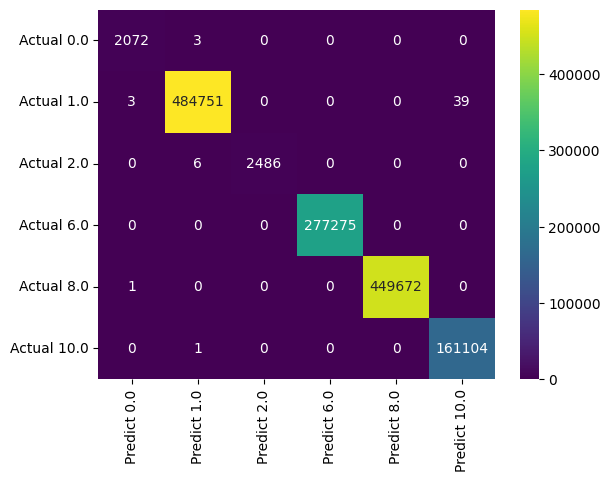

In [49]:
precision_rf, recall_rf = show_matrix_confusion(Y_test, y_RF_pred)
print(precision_rf, recall_rf)
# f1_score
f1_score_rf = f1_score_model(precision_rf, recall_rf)

In [50]:
from sklearn.model_selection import GridSearchCV

# # Number of trees in random forest
# n_estimators = [int(x) for x in np.linspace(start = 1, stop = 40, num = 5)]
# # Number of features to consider at every split
# max_features = ['auto', 'sqrt']
# # Maximum number of levels in tree
# max_depth = [2,4]
# # Minimum number of samples required to split a node
# min_samples_split = [2, 5]
# # Minimum number of samples required at each leaf node
# min_samples_leaf = [1, 2]
# # Method of selecting samples for training each tree
# bootstrap = [True, False]

# # Create the param grid
# param_grid = {'n_estimators': n_estimators,
#                'max_features': max_features,
#                'max_depth': max_depth,
#                'min_samples_split': min_samples_split,
#                'min_samples_leaf': min_samples_leaf,
#                'bootstrap': bootstrap}
# print(param_grid)

# from sklearn.model_selection import GridSearchCV
# rf_Grid = GridSearchCV(estimator = RF, param_grid = param_grid, cv = 5, verbose=2, n_jobs = 4)

In [51]:
# rf_Grid.fit(X_train, Y_train)
# rf_Grid.best_params_

In [52]:
# print (f'Train Accuracy - : {rf_Grid.score(X_train,Y_train):.3f}')
# print (f'Test Accuracy - : {rf_Grid.score(X_test,Y_test):.3f}')

In [53]:
# {'n_neighbors': 3, 'p': 1, 'weights': 'distance'}

from sklearn.neighbors import KNeighborsClassifier

start = time()
# n_neighbors = 3, p = 1, weights = 'distance'
knn_model = KNeighborsClassifier()

knn_model.fit(X_train, Y_train)

# Dự đoán kết quả trên tập kiểm tra
Y_pred = cross_val_predict(knn_model, X_test, Y_test, cv=10)

# Đánh giá hiệu suất của mô hình
accuracy_knn = accuracy_score(Y_test, Y_pred)
print(f'Độ chính xác: {accuracy_knn}')

end = time()
time_knn = end - start

print('time cost: ')
print(end - start, 'seconds')

Độ chính xác: 0.999041681761389
time cost: 
96.10718035697937 seconds


Ma tran nham lan 
 [[  1998     77      0      0      0      0]
 [    71 483986      0     15      0    721]
 [     0     15   2477      0      0      0]
 [     0      4      0 277271      0      0]
 [     0      0      0      0 449673      0]
 [     0    417      0      0      0 160688]]

Bảng đánh giá hiệu suất trung bình vi mô và vĩ mô của mô hình 
            Micro_averaging  Macro_averaging
precision         0.999042         0.993351
recall            0.999042         0.992101


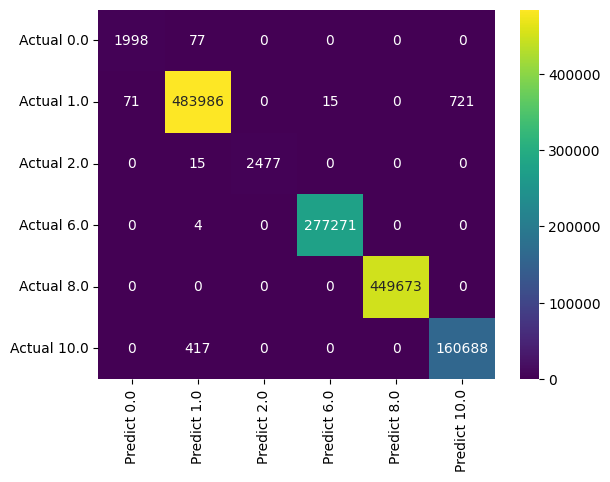

In [54]:
precision_knn, recall_knn = show_matrix_confusion(Y_test, Y_pred)
# f1_score
f1_score_knn = f1_score_model(precision_knn, recall_knn)

## Search super param KNeighborsClassifier

In [55]:
# # Danh sách các siêu tham số và các giá trị thử nghiệm
# param_grid = {
#     'n_neighbors': [3, 5, 7, 9],
#     'weights': ['uniform', 'distance'],
#     'p': [1, 2]
# }

# # Tạo một GridSearchCV object
# knn_search = GridSearchCV(knn_model, param_grid, cv=5, scoring='accuracy')

# # Tiến hành tìm kiếm
# knn_search.fit(X_train, Y_train)

# # In ra các siêu tham số tốt nhất
# print("Siêu tham số tốt nhất:", knn_search.best_params_)
# print("Điểm đạt được tốt nhất:", knn_search.best_score_)

In [56]:
# print (f'Train Accuracy - : {knn_search.score(X_train,Y_train):.3f}')
# print (f'Test Accuracy - : {knn_search.score(X_test,Y_test):.3f}')

## DecisionTree

In [57]:
from sklearn.tree import DecisionTreeClassifier
import pickle

start = time()
# criterion = 'gini', max_depth = None, max_features = 'sqrt', min_samples_leaf = 4, min_samples_split = 2
# {'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 10}
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, Y_train)

# Dự đoán kết quả trên tập kiểm tra
Y_pred = cross_val_predict(dt_model, X_test, Y_test, cv=10)

# Đối với phân loại
accuracy_dt = accuracy_score(Y_test, Y_pred)
print(f'Độ chính xác: {accuracy_dt}')

end = time()

time_dt = end - start

print('time cost: ')
print(end - start, 'seconds')

# luu model
pickle.dump(dt_model, open('model.pkl', 'wb'))
model = pickle.load(open('model.pkl', 'rb'))

Độ chính xác: 0.9999876580226845
time cost: 
20.271960496902466 seconds


Ma tran nham lan 
 [[  2069      6      0      0      0      0]
 [     3 484784      1      0      1      4]
 [     0      0   2492      0      0      0]
 [     0      0      0 277275      0      0]
 [     0      0      0      0 449673      0]
 [     0      2      0      0      0 161103]]

Bảng đánh giá hiệu suất trung bình vi mô và vĩ mô của mô hình 
            Micro_averaging  Macro_averaging
precision         0.999988         0.999685
recall            0.999988         0.999513


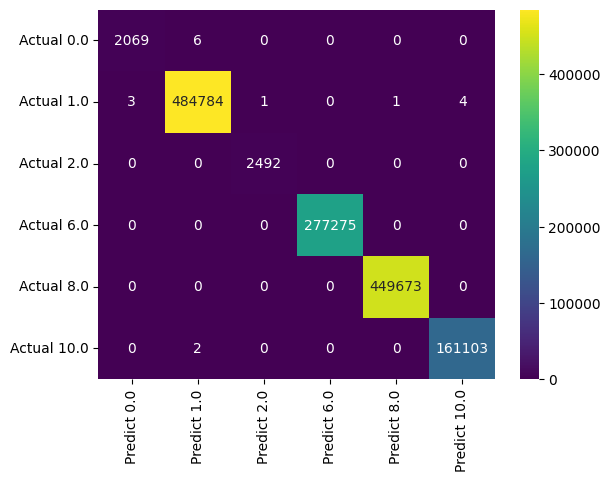

In [58]:
precision_dt, recall_dt = show_matrix_confusion(Y_test, Y_pred)
# f1_score
f1_score_dt = f1_score_model(precision_dt, recall_dt)

## Super param of DecisionTree

In [59]:
# # Định nghĩa các giá trị của siêu tham số cần tinh chỉnh
# param_grid = {
#     'criterion': ['gini', 'entropy'],
#     'max_depth': [None, 5, 10, 15],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4],
#     'max_features': ['auto', 'sqrt', 'log2']
# }

# # Tạo GridSearchCV object
# dt_search = GridSearchCV(dt_model, param_grid, cv=5)

# # Tiến hành tìm kiếm siêu tham số tốt nhất
# dt_search.fit(X_train, Y_train)

# # In ra siêu tham số tốt nhất và điểm số tương ứng
# print("Các siêu tham số tốt nhất:", dt_search.best_params_)
# print("Điểm số tốt nhất:", dt_search.best_score_)

In [60]:
# print (f'Train Accuracy - : {dt_search.score(X_train,Y_train):.3f}')
# print (f'Test Accuracy - : {dt_search.score(X_test,Y_test):.3f}')

# Dữ liệu đa nhãn

In [61]:
import xgboost as xgb

start = time()
# n_estimators=100, max_depth=3, learning_rate=0.1, random_state=42
xgb_model = xgb.XGBClassifier()

xgb_model.fit(X_train, Y_train)

# Dự đoán kết quả trên tập kiểm tra
Y_pred = xgb_model.predict(X_test)

# Đối với phân loại
accuracy_xgb = accuracy_score(Y_test, Y_pred)
print(f'Độ chính xác: {accuracy_xgb}')

end = time()

time_xgb = end - start

print('time cost: ')
print(end - start, 'seconds')

Độ chính xác: 0.9995005129180573
time cost: 
101.97403621673584 seconds


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_6900\2783064296.py:26: RuntimeWarning: invalid value encountered in longlong_scalars
  recall[i] = TP / (TP + FN)


Ma tran nham lan 
 [[  1979      7      0      2     81      6      0      0      0]
 [     0 484226      1      0      0      2      0      0    564]
 [     0      3   2489      0      0      0      0      0      0]
 [     0      0      0      0      0      0      0      0      0]
 [     0      0      0      0      0      0      0      0      0]
 [     0      0      0      0      0      0      0      0      0]
 [     0      0      0      0      0      0 277275      0      0]
 [     0      0      0      0      0      0      0 449673      0]
 [     0     21      1      0      0      0      0      0 161083]]

Bảng đánh giá hiệu suất trung bình vi mô và vĩ mô của mô hình 
            Micro_averaging  Macro_averaging
precision         0.999501         0.666183
recall            0.999501         0.661247


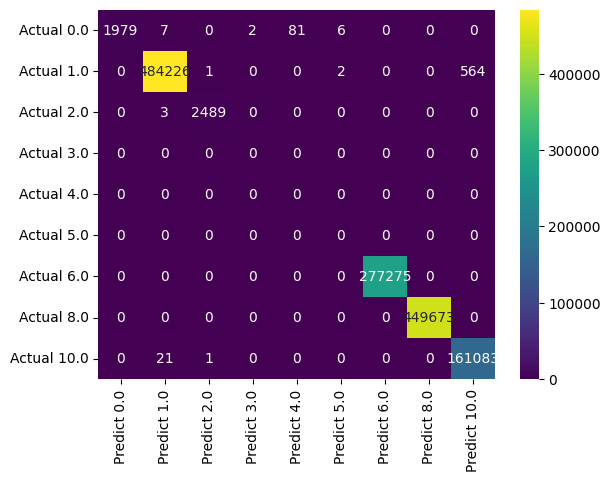

In [62]:
precision_xgb, recall_xgb = show_matrix_confusion(Y_test, Y_pred)
# f1_score
f1_score_xgb = f1_score_model(precision_xgb, recall_xgb)

In [63]:
# # Định nghĩa các giá trị của siêu tham số cần tinh chỉnh
# param_grid = {
#     'max_depth': [3, 4, 5],
#     'learning_rate': [0.1, 0.01, 0.001],
#     'n_estimators': [50, 100, 200],
#     'subsample': [0.8, 0.9, 1.0],
#     'colsample_bytree': [0.8, 0.9, 1.0]
# }

# # Tạo GridSearchCV object
# xgb_search = GridSearchCV(xgb_model, param_grid, cv=5)

# # Tiến hành tìm kiếm siêu tham số tốt nhất
# xgb_search.fit(X_train, Y_train)

# # In ra siêu tham số tốt nhất và điểm số tương ứng
# print("Các siêu tham số tốt nhất:", xgb_search.best_params_)
# print("Điểm số tốt nhất:", xgb_search.best_score_)

In [64]:
# print (f'Train Accuracy - : {xgb_search.score(X_train,Y_train):.6f}')
# print (f'Test Accuracy - : {xgb_search.score(X_test,Y_test):.6f}')

# Siêu tham số

In [65]:
# random_state=42, bootstrap = True, max_depth = 4, max_features = 'auto', min_samples_leaf = 1, min_samples_split = 2, n_estimators = 72
# {'bootstrap': True,
#  'max_depth': 4,
#  'max_features': 'sqrt',
#  'min_samples_leaf': 1,
#  'min_samples_split': 5,
#  'n_estimators': 40}
RF_bf = RandomForestClassifier(bootstrap = True, max_depth = 4, max_features = 'sqrt', min_samples_leaf = 1, min_samples_split = 5, n_estimators = 40)
start = time()

RF_bf.fit(X_train, Y_train)

# # luu model
# with open('model.pkl', 'wb') as model_file:
#     pickle.dump(RF, model_file)

y_RF_pred = cross_val_predict(RF_bf, X_test, Y_test, cv=10)

acc_rf_bf = accuracy_score(y_RF_pred, Y_test)

print('Accuracy Score:')
print(acc_rf_bf)

end = time()
time_rf_bf = end - start

print('time cost: ')
print(time_rf_bf, 'seconds')

Accuracy Score:
0.9888007445842315
time cost: 
197.13356375694275 seconds


Ma tran nham lan 
 [[  1594    481      0      0      0      0]
 [     2 483213      0      0      0   1578]
 [     0   1002   1066      0      0    424]
 [     0     42      0 277233      0      0]
 [     0      1      0      0 449672      0]
 [     0  11896      0      0      0 149209]]

Bảng đánh giá hiệu suất trung bình vi mô và vĩ mô của mô hình 
            Micro_averaging  Macro_averaging
precision         0.988801         0.993080
recall            0.988801         0.853118


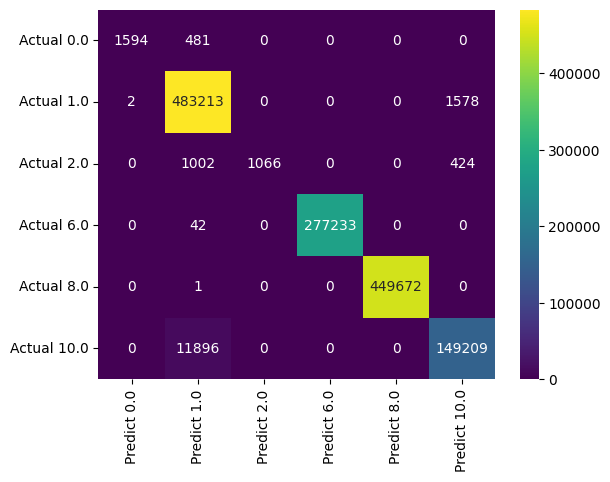

In [66]:
precision_rf_bf, recall_rf_bf = show_matrix_confusion(Y_test, y_RF_pred)
# f1_score
f1_score_rf_bf = f1_score_model(precision_rf_bf, recall_rf_bf)

In [67]:
# {'n_neighbors': 3, 'p': 1, 'weights': 'distance'}

from sklearn.neighbors import KNeighborsClassifier

start = time()
# n_neighbors = 3, p = 1, weights = 'distance'
knn_model_bf = KNeighborsClassifier(n_neighbors = 3, p = 1, weights = 'distance')

knn_model_bf.fit(X_train, Y_train)

# Dự đoán kết quả trên tập kiểm tra
Y_pred = cross_val_predict(knn_model_bf, X_test, Y_test, cv=10)

# Đánh giá hiệu suất của mô hình
accuracy_knn_bf = accuracy_score(Y_test, Y_pred)
print(f'Độ chính xác: {accuracy_knn_bf}')

end = time()
time_knn_bf = end - start

print('time cost: ')
print(end - start, 'seconds')

Độ chính xác: 0.9995317308606787
time cost: 
73.62930274009705 seconds


Ma tran nham lan 
 [[  2010     65      0      0      0      0]
 [    34 484395      0      8      0    356]
 [     0     12   2480      0      0      0]
 [     0      1      0 277274      0      0]
 [     0      0      0      0 449673      0]
 [     0    169      0      0      0 160936]]

Bảng đánh giá hiệu suất trung bình vi mô và vĩ mô của mô hình 
            Micro_averaging  Macro_averaging
precision         0.999532         0.996770
recall            0.999532         0.993664


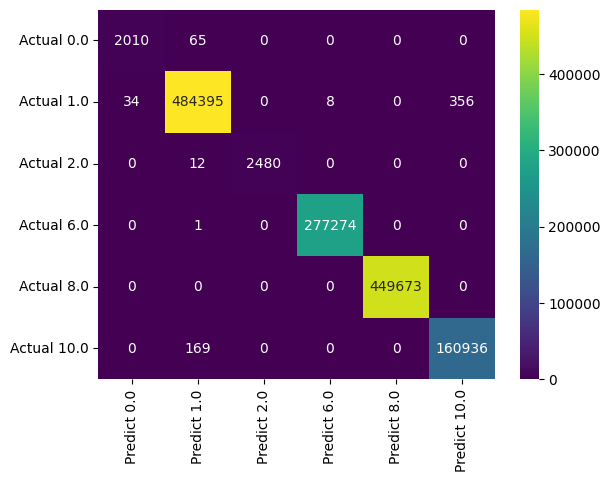

In [68]:
precision_knn_bf, recall_knn_bf = show_matrix_confusion(Y_test, Y_pred)
# f1_score
f1_score_knn_bf = f1_score_model(precision_knn_bf, recall_knn_bf)

In [69]:
from sklearn.tree import DecisionTreeClassifier
import pickle

start = time()
dt_model_bf = DecisionTreeClassifier(criterion = 'gini', max_depth = None, max_features = 'sqrt', min_samples_leaf = 1, min_samples_split = 10)
dt_model_bf.fit(X_train, Y_train)

# Dự đoán kết quả trên tập kiểm tra
Y_pred = cross_val_predict(dt_model_bf, X_test, Y_test, cv=10)

# Đối với phân loại
accuracy_dt_bf = accuracy_score(Y_test, Y_pred)
print(f'Độ chính xác: {accuracy_dt_bf}')

end = time()

time_dt_bf = end - start

print('time cost: ')
print(end - start, 'seconds')

# # luu model
# pickle.dump(dt_model_bf, open('model.pkl', 'wb'))

# model = pickle.load(open('model.pkl', 'rb'))

Độ chính xác: 0.9998881962054954
time cost: 
10.506139993667603 seconds


Ma tran nham lan 
 [[  2066      8      1      0      0      0]
 [     9 484699      5      6      1     73]
 [     1      6   2484      0      0      1]
 [     0      4      0 277271      0      0]
 [     1      0      0      0 449672      0]
 [     0     38      0      0      0 161067]]

Bảng đánh giá hiệu suất trung bình vi mô và vĩ mô của mô hình 
            Micro_averaging  Macro_averaging
precision         0.999888         0.998616
recall            0.999888         0.998668


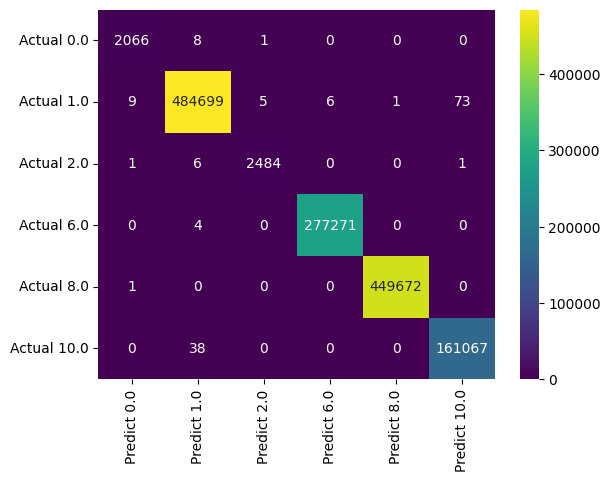

In [70]:
precision_dt_bf, recall_dt_bf = show_matrix_confusion(Y_test, Y_pred)
# f1_score
f1_score_dt_bf = f1_score_model(precision_dt_bf, recall_dt_bf)

In [71]:
import xgboost as xgb

start = time()
# n_estimators=100, max_depth=3, learning_rate=0.1, random_state=42
xgb_model_bf = xgb.XGBClassifier(n_estimators=100, max_depth=3, learning_rate=0.1, random_state=42)

xgb_model_bf.fit(X_train, Y_train)

# Dự đoán kết quả trên tập kiểm tra
Y_pred = xgb_model_bf.predict(X_test)

# Đối với phân loại
accuracy_xgb_bf = accuracy_score(Y_test, Y_pred)
print(f'Độ chính xác: {accuracy_xgb_bf}')

end = time()

time_xgb_bf = end - start

print('time cost: ')
print(end - start, 'seconds')

Độ chính xác: 0.9994112150821867
time cost: 
90.69871354103088 seconds


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_6900\2783064296.py:26: RuntimeWarning: invalid value encountered in longlong_scalars
  recall[i] = TP / (TP + FN)


Ma tran nham lan 
 [[  1977      9      0      2     81      0      0      6]
 [     0 484132      0      0      0      0      0    661]
 [     0     17   2475      0      0      0      0      0]
 [     0      0      0      0      0      0      0      0]
 [     0      0      0      0      0      0      0      0]
 [     0      4      0      0      0 277271      0      0]
 [     0      0      0      0      0      0 449673      0]
 [     0     31      0      0      0      0      0 161074]]

Bảng đánh giá hiệu suất trung bình vi mô và vĩ mô của mô hình 
            Micro_averaging  Macro_averaging
precision         0.999411         0.749469
recall            0.999411         0.743047


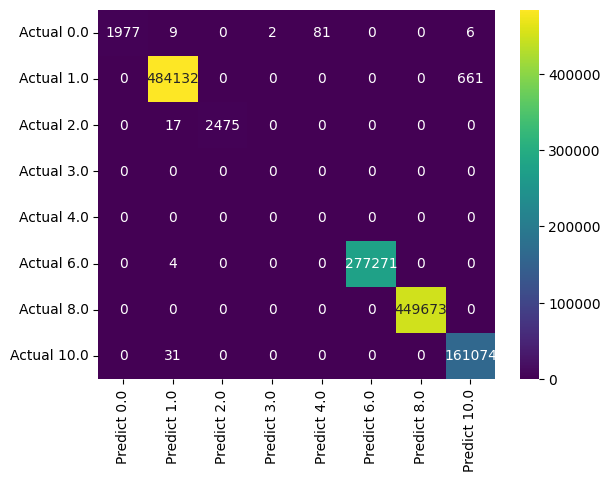

In [72]:
precision_xgb_bf, recall_xgb_bf = show_matrix_confusion(Y_test, Y_pred)
# f1_score
f1_score_xgb_bf = f1_score_model(precision_xgb_bf, recall_xgb_bf)

# Trực quan dữ liệu so sánh các model

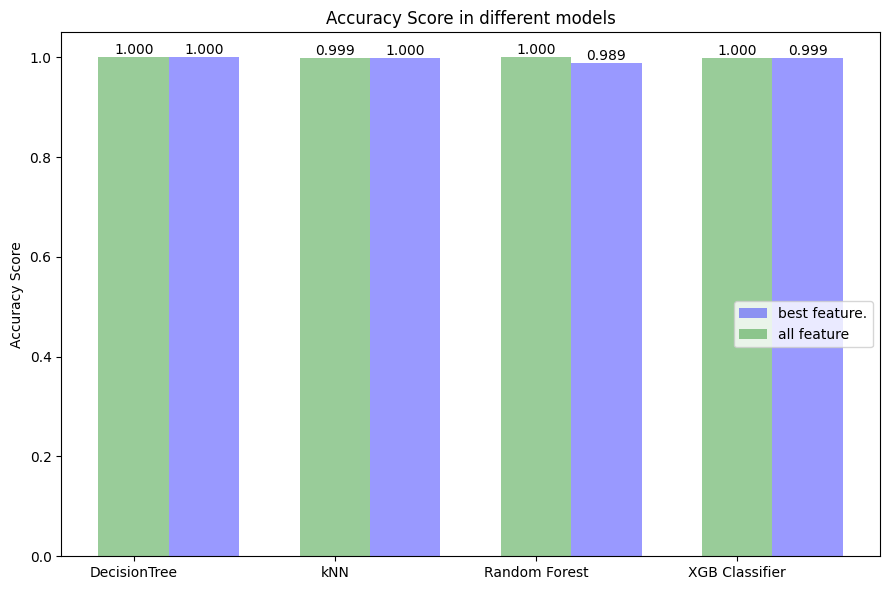

In [73]:
scores = {
    "DecisionTree": accuracy_dt,
    "kNN": accuracy_knn,
    "Random Forest": acc_rf,
    "XGB Classifier": accuracy_xgb,
    }
scores_best = {
    "DecisionTree": accuracy_dt_bf,
    "kNN": accuracy_knn_bf,
    "Random Forest": acc_rf_bf,
    "XGB Classifier": accuracy_xgb_bf,
    }

models = list(scores.keys())

values = list(scores.values())
values_bf = list(scores_best.values())

opacity = 0.4
bar_width = 0.35

fig,ax = plt.subplots(figsize=(9, 6))

plt.xticks(range(len(models)), labels=models)
bar1 = plt.bar(np.arange(len(values_bf)) + bar_width, values_bf, bar_width, align='center', alpha=opacity, color='b', label='best feature.')
bar2 = plt.bar(range(len(values)), values, bar_width, align='center', alpha=opacity, color='g', label='all feature')

# Add counts above the two bar graphs
for rect in bar2+ bar1:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width() / 2.0, height, f'{height:.3f}', ha='center', va='bottom')
ax.set_ylabel("Accuracy Score")
ax.set_title("Accuracy Score in different models")
plt.legend(loc='upper right', bbox_to_anchor=(1, 0.5))
plt.tight_layout()
plt.show()

# precision, recall, f1_score

<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

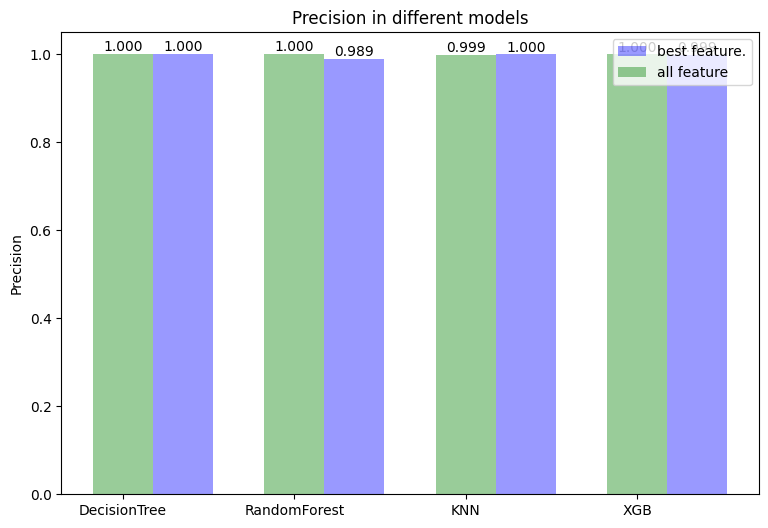

In [74]:
ML_models = ['DecisionTree', 'RandomForest', 'KNN', "XGB"]
models = ML_models
values = [precision_dt, precision_rf, precision_knn, precision_xgb]
values_bf = [precision_dt_bf, precision_rf_bf, precision_knn_bf, precision_xgb_bf]

opacity = 0.4
bar_width = 0.35

fig,ax = plt.subplots(figsize=(9, 6))

plt.xticks(range(len(models)), labels=models)
bar1 = plt.bar(np.arange(len(values_bf)) + bar_width , values_bf, bar_width, align='center', alpha=opacity, color='b', label='best feature.')
bar2 = plt.bar(range(len(values)), values, bar_width, align='center', alpha=opacity, color='g', label='all feature')

# Add counts above the two bar graphs
for rect in bar2+ bar1:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width() / 2.0, height, f'{height:.3f}', ha='center', va='bottom')
ax.set_ylabel("Precision")
ax.set_title("Precision in different models")
plt.legend()
plt.tight_layout

<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

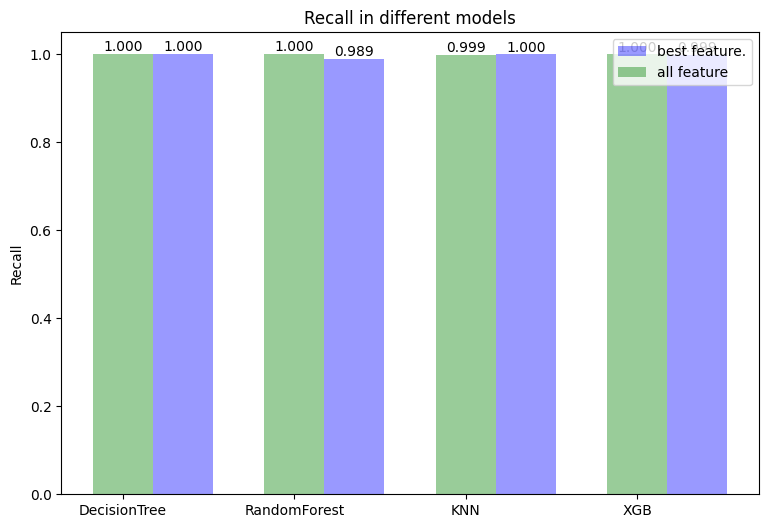

In [75]:
ML_models = ['DecisionTree', 'RandomForest', 'KNN', "XGB"]
models = ML_models
values = [recall_dt, recall_rf, recall_knn, recall_xgb]
values_bf = [recall_dt_bf, recall_rf_bf, recall_knn_bf, recall_xgb_bf]

opacity = 0.4
bar_width = 0.35

fig,ax = plt.subplots(figsize=(9, 6))

plt.xticks(range(len(models)), labels=models)
bar1 = plt.bar(np.arange(len(values_bf)) + bar_width , values_bf, bar_width, align='center', alpha=opacity, color='b', label='best feature.')
bar2 = plt.bar(range(len(values)), values, bar_width, align='center', alpha=opacity, color='g', label='all feature')

# Add counts above the two bar graphs
for rect in bar2+ bar1:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width() / 2.0, height, f'{height:.3f}', ha='center', va='bottom')
ax.set_ylabel("Recall")
ax.set_title("Recall in different models")
plt.legend()
plt.tight_layout

<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

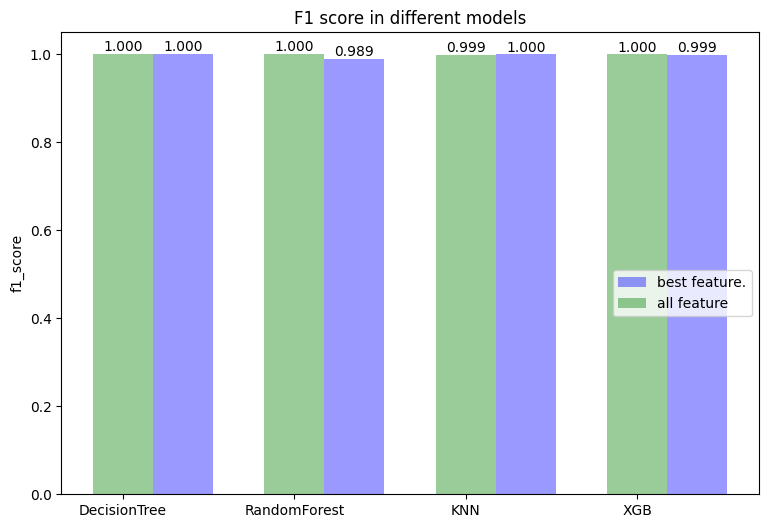

In [76]:
ML_models = ['DecisionTree', 'RandomForest', 'KNN', "XGB"]
models = ML_models
values = [f1_score_dt, f1_score_rf, f1_score_knn, f1_score_xgb]
values_bf = [f1_score_dt_bf, f1_score_rf_bf, f1_score_knn_bf, f1_score_xgb_bf]

opacity = 0.4
bar_width = 0.35

fig,ax = plt.subplots(figsize=(9, 6))

plt.xticks(range(len(models)), labels=models)
bar1 = plt.bar(np.arange(len(values_bf)) + bar_width , values_bf, bar_width, align='center', alpha=opacity, color='b', label='best feature.')
bar2 = plt.bar(range(len(values)), values, bar_width, align='center', alpha=opacity, color='g', label='all feature')

# Add counts above the two bar graphs
for rect in bar2+ bar1:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width() / 2.0, height, f'{height:.3f}', ha='center', va='bottom')
ax.set_ylabel("f1_score")
ax.set_title("F1 score in different models")
plt.legend(loc='upper right', bbox_to_anchor=(1, 0.5))
plt.tight_layout

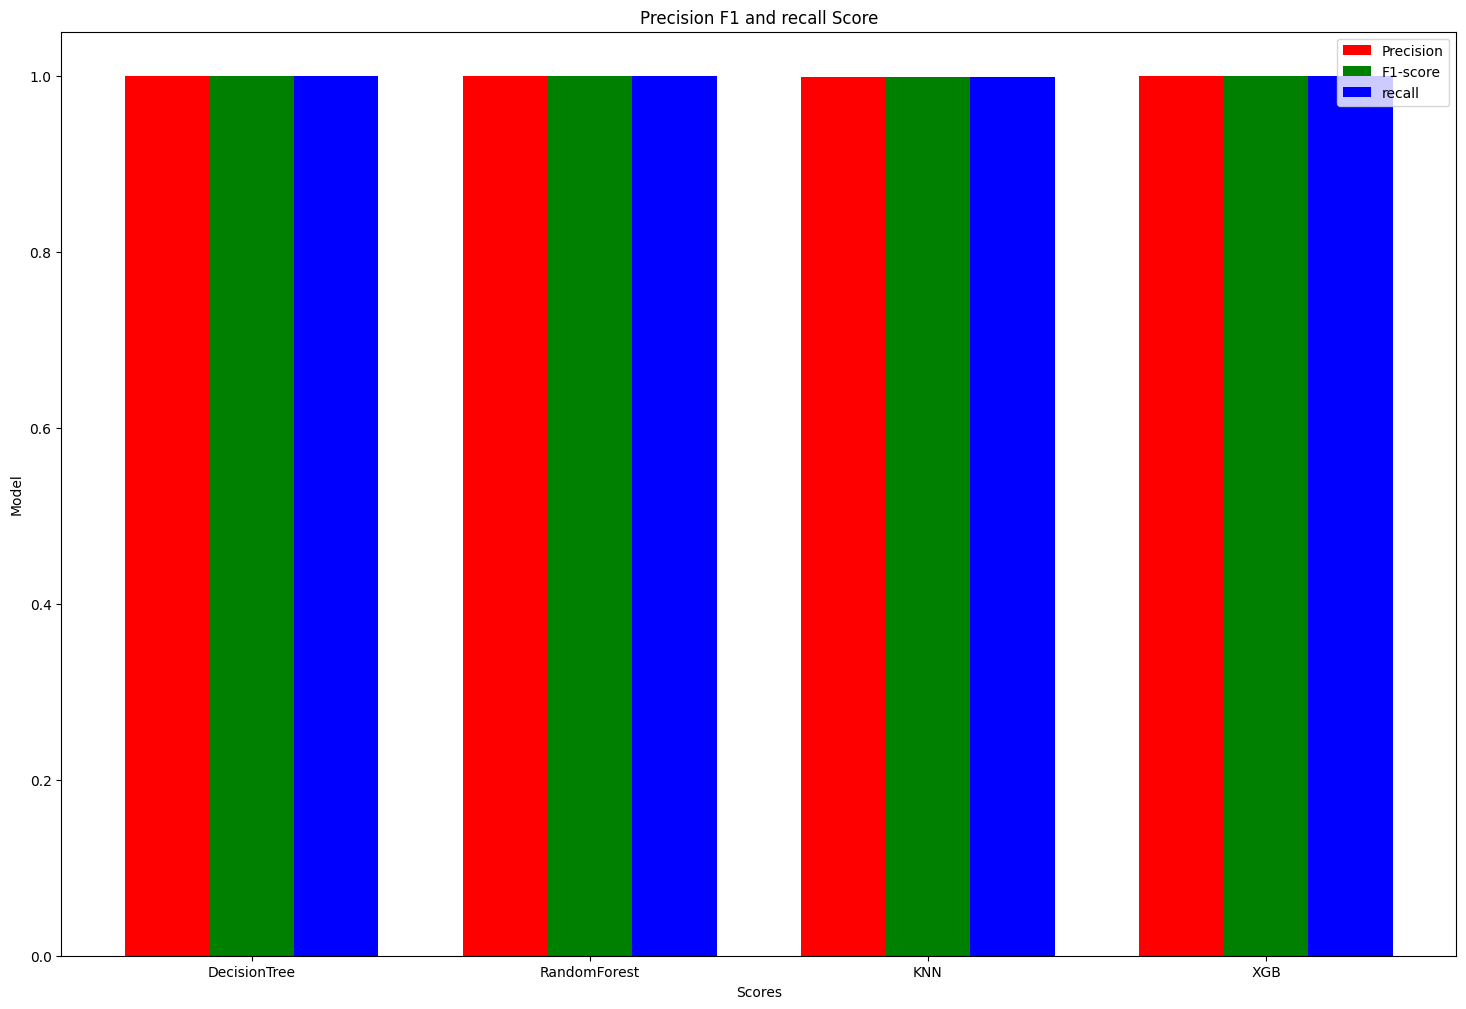

In [77]:
ind = np.arange(len(ML_models))
width = 0.25

precision = [precision_dt, precision_rf, precision_knn, precision_xgb]
recall_score = [recall_dt, recall_rf, recall_knn, recall_xgb]
f1_score = [f1_score_dt, f1_score_rf, f1_score_knn, f1_score_xgb]

fig, ax = plt.subplots(figsize=(18, 12))

precision_vals = precision
bar1 = plt.bar(ind, precision_vals, width, color = 'r')

f1_score_vals = f1_score
bar2 = plt.bar(ind+width, f1_score_vals, width, color='g')

recall_vals = recall_score
bar3 = plt.bar(ind+width*2, recall_vals, width, color = 'b')

plt.xlabel("Scores")
plt.ylabel('Model')
plt.title("Precision F1 and recall Score")

plt.xticks(ind+width,ML_models)
plt.legend( (bar1, bar2, bar3), ('Precision', 'F1-score', 'recall') )
plt.show()

# Time Usage in defferent models

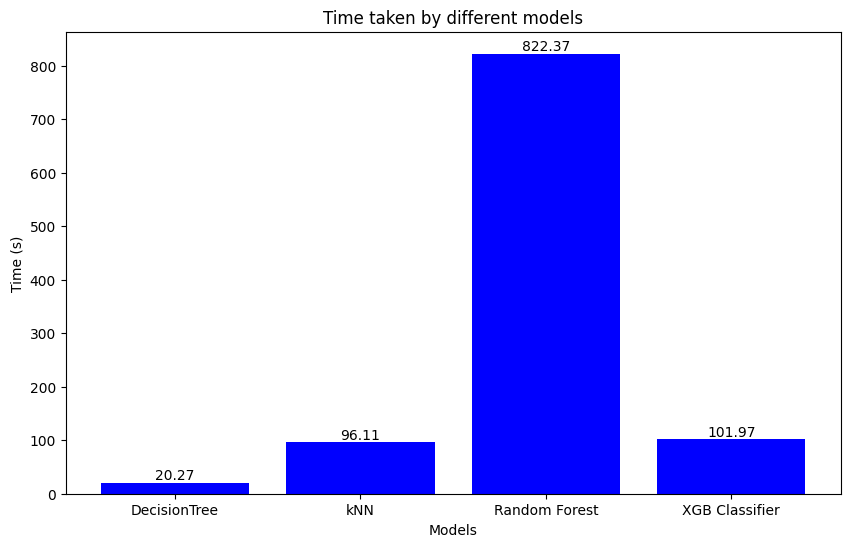

In [78]:
time_models = {
    "DecisionTree": time_dt,
    "kNN": time_knn,
    "Random Forest": time_rf,
    "XGB Classifier": time_xgb,
    }
models = list(time_models.keys())
times = list(time_models.values())

# Tạo biểu đồ
plt.figure(figsize=(10, 6))
bars = plt.bar(models, times, color='blue')
plt.xlabel('Models')
plt.ylabel('Time (s)')
plt.title('Time taken by different models')

# Thêm giá trị lên đỉnh của cột
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')

plt.show()

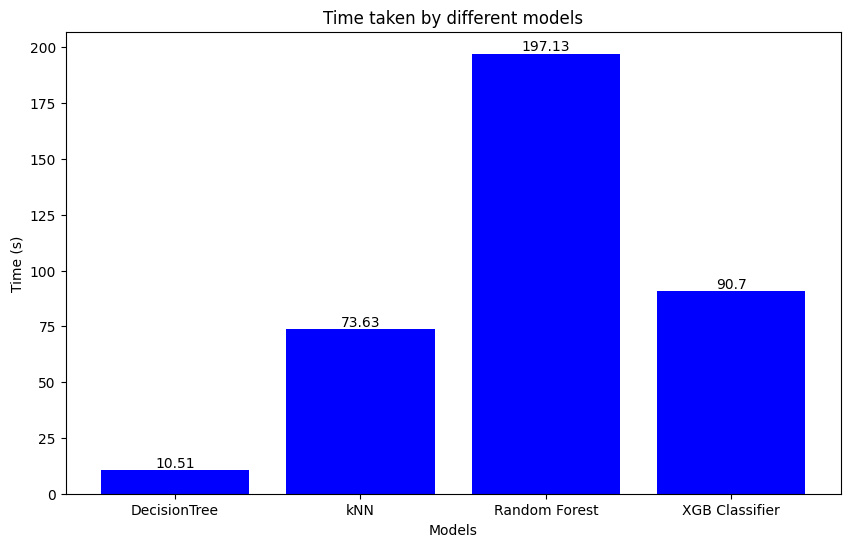

In [79]:
time_models_best = {
    "DecisionTree": time_dt_bf,
    "kNN": time_knn_bf,
    "Random Forest": time_rf_bf,
    "XGB Classifier": time_xgb_bf,
    }

models = list(time_models_best.keys())
times = list(time_models_best.values())

# Tạo biểu đồ
plt.figure(figsize=(10, 6))
bars = plt.bar(models, times, color='blue')
plt.xlabel('Models')
plt.ylabel('Time (s)')
plt.title('Time taken by different models')

# Thêm giá trị lên đỉnh của cột
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')

plt.show()

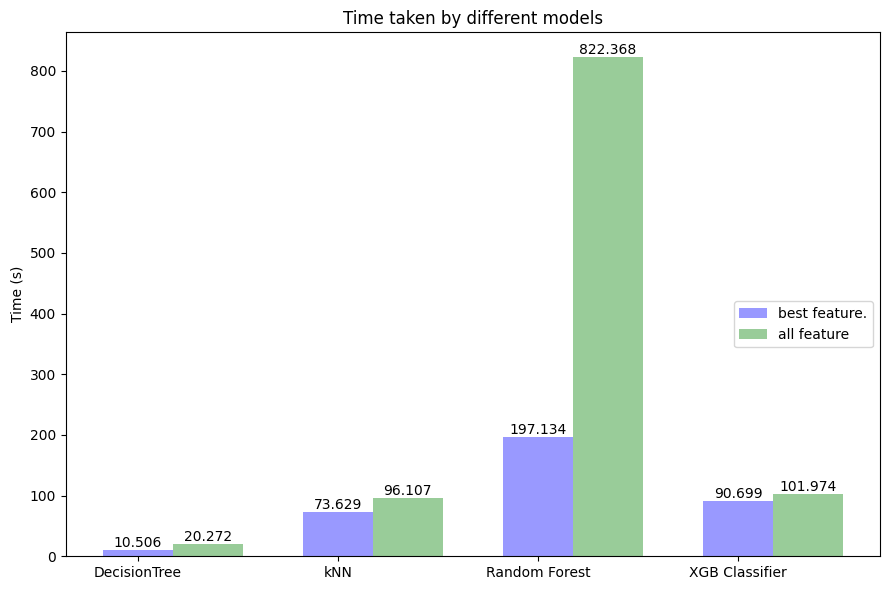

In [80]:
time_models = {
    "DecisionTree": time_dt,
    "kNN": time_knn,
    "Random Forest": time_rf,
    "XGB Classifier": time_xgb,
    }
time_models_best = {
    "DecisionTree": time_dt_bf,
    "kNN": time_knn_bf,
    "Random Forest": time_rf_bf,
    "XGB Classifier": time_xgb_bf,
    }

models = list(time_models.keys())

values = list(time_models.values())
values_bf = list(time_models_best.values())

opacity = 0.4
bar_width = 0.35

fig, ax = plt.subplots(figsize=(9, 6))

plt.xticks(range(len(models)), labels=models)
bar1 = plt.bar(range(len(values_bf)), values_bf, bar_width, align='center', alpha=opacity, color='b', label='best feature.')
bar2 = plt.bar(np.arange(len(values)) + bar_width, values, bar_width, align='center', alpha=opacity, color='g', label='all feature')

for rect in bar2 + bar1:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width() / 2.0, height, f'{height:.3f}', ha='center', va='bottom')

ax.set_ylabel("Time (s)")
ax.set_title("Time taken by different models")
plt.legend(loc='upper right', bbox_to_anchor=(1, 0.5))

plt.tight_layout()
plt.show()